# Decomposition

Of cloud fluxes for a given field variable $\phi$

$$\overline{w'\chi'} = a\overline{w''\phi''}^c + (1-a)\overline{w''\phi''}^e +M_c(\overline{\phi}^c - \overline{\phi}^e)$$
where 
$$ M_c =  a(1-a)(\overline{w}^c - \overline{w}^e)$$



## One time step



In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from helper_functions import *

# Specify the timestep to analyse
timestep = 23
liquid_water_threshold = 10**(-8) #10e-6 = 10e-5 # kg/kg

# Load height values
zt_values = load_zt_values()

# Calculate m_c values for different variables
m_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = calculate_m_c_for_timestep(
    timestep, 'q_l', rho_air * L_v, liquid_water_threshold)

m_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = calculate_m_c_for_timestep(
    timestep, 'q_t', rho_air * L_v, liquid_water_threshold)

m_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = calculate_m_c_for_timestep(
    timestep, 'theta_l', rho_air * c_p, liquid_water_threshold)

m_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values = calculate_m_c_for_timestep(
    timestep, 'theta', rho_air * c_p, liquid_water_threshold)

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

plot_with_additional_lines(ax1, m_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values, r'$\overline{w^{\prime}\theta_l^{\prime}}$', zt_values)
plot_with_additional_lines(ax2, m_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values, r'$\overline{w^{\prime}q_t^{\prime}}$', zt_values)
plot_with_additional_lines(ax3, m_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values, r'$\overline{w^{\prime}\theta^{\prime}}$', zt_values)
plot_with_additional_lines(ax4, m_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values, r'$\overline{w^{\prime}q_l^{\prime}}$', zt_values)

plt.tight_layout()
plt.show()


In [ ]:
plt.plot(environment_theta_values, zt_values)

In [ ]:
print (np.sum(environment_theta_values))

## Averaging over multiple timesteps

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import *

# Specify the range of timesteps to analyze
timesteps = range(25, 35)  # Example range of timesteps
liquid_water_threshold = 10**(-11) # kg/kg

# Load height values
zt_values = load_zt_values()

# Initialize lists to store the accumulated sums
m_c_l_sum = np.zeros_like(zt_values)
active_cloudy_l_sum = np.zeros_like(zt_values)
environment_l_sum = np.zeros_like(zt_values)
total_flux_l_sum = np.zeros_like(zt_values)

m_c_qt_sum = np.zeros_like(zt_values)
active_cloudy_qt_sum = np.zeros_like(zt_values)
environment_qt_sum = np.zeros_like(zt_values)
total_flux_qt_sum = np.zeros_like(zt_values)

m_c_theta_l_sum = np.zeros_like(zt_values)
active_cloudy_theta_l_sum = np.zeros_like(zt_values)
environment_theta_l_sum = np.zeros_like(zt_values)
total_flux_theta_l_sum = np.zeros_like(zt_values)

m_c_theta_sum = np.zeros_like(zt_values)
active_cloudy_theta_sum = np.zeros_like(zt_values)
environment_theta_sum = np.zeros_like(zt_values)
total_flux_theta_sum = np.zeros_like(zt_values)

# Loop through each timestep, calculate, and accumulate the sums
for timestep in timesteps:
    m_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = calculate_m_c_for_timestep(
        timestep, 'q_l', rho_air * L_v, liquid_water_threshold)
    m_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = calculate_m_c_for_timestep(
        timestep, 'q_t', rho_air * L_v, liquid_water_threshold)
    m_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = calculate_m_c_for_timestep(
        timestep, 'theta_l', rho_air * c_p, liquid_water_threshold)
    m_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values = calculate_m_c_for_timestep(
        timestep, 'theta', rho_air * c_p, liquid_water_threshold)

    m_c_l_sum += m_c_l_values
    active_cloudy_l_sum += active_cloudy_l_values
    environment_l_sum += environment_l_values
    total_flux_l_sum += total_flux_l_values

    m_c_qt_sum += m_c_qt_values
    active_cloudy_qt_sum += active_cloudy_qt_values
    environment_qt_sum += environment_qt_values
    total_flux_qt_sum += total_flux_qt_values

    m_c_theta_l_sum += m_c_theta_l_values
    active_cloudy_theta_l_sum += active_cloudy_theta_l_values
    environment_theta_l_sum += environment_theta_l_values
    total_flux_theta_l_sum += total_flux_theta_l_values

    m_c_theta_sum += m_c_theta_values
    active_cloudy_theta_sum += active_cloudy_theta_values
    environment_theta_sum += environment_theta_values
    total_flux_theta_sum += total_flux_theta_values

# Calculate the averages
num_timesteps = len(timesteps)

m_c_l_avg = m_c_l_sum / num_timesteps
active_cloudy_l_avg = active_cloudy_l_sum / num_timesteps
environment_l_avg = environment_l_sum / num_timesteps
total_flux_l_avg = total_flux_l_sum / num_timesteps

m_c_qt_avg = m_c_qt_sum / num_timesteps
active_cloudy_qt_avg = active_cloudy_qt_sum / num_timesteps
environment_qt_avg = environment_qt_sum / num_timesteps
total_flux_qt_avg = total_flux_qt_sum / num_timesteps

m_c_theta_l_avg = m_c_theta_l_sum / num_timesteps
active_cloudy_theta_l_avg = active_cloudy_theta_l_sum / num_timesteps
environment_theta_l_avg = environment_theta_l_sum / num_timesteps
total_flux_theta_l_avg = total_flux_theta_l_sum / num_timesteps

m_c_theta_avg = m_c_theta_sum / num_timesteps
active_cloudy_theta_avg = active_cloudy_theta_sum / num_timesteps
environment_theta_avg = environment_theta_sum / num_timesteps
total_flux_theta_avg = total_flux_theta_sum / num_timesteps

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

plot_with_additional_lines(ax1, m_c_theta_l_avg, active_cloudy_theta_l_avg, environment_theta_l_avg, total_flux_theta_l_avg, r'$\overline{w^{\prime}\theta_l^{\prime}}$', zt_values)
plot_with_additional_lines(ax2, m_c_qt_avg, active_cloudy_qt_avg, environment_qt_avg, total_flux_qt_avg, r'$\overline{w^{\prime}q_t^{\prime}}$', zt_values)
plot_with_additional_lines(ax3, m_c_theta_avg, active_cloudy_theta_avg, environment_theta_avg, total_flux_theta_avg, r'$\overline{w^{\prime}\theta^{\prime}}$', zt_values)
plot_with_additional_lines(ax4, m_c_l_avg, active_cloudy_l_avg, environment_l_avg, total_flux_l_avg, r'$\overline{w^{\prime}q_l^{\prime}}$', zt_values)

plt.tight_layout()
plt.show()


## Sensitivity to liquid water threshold

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import *

# Specify the range of timesteps to analyze
timesteps = range(24, 25)  # Example range of timesteps

# Specify the liquid water thresholds
thresholds = np.logspace(-5.9, -10.0, num=3)
#[5*10e-7, 10e-7, 5*10e-8, 10e-8, 5*10e-9, 10e-9, 5*10e-10, 10e-10, 5*10e-11, 10e-11, 5*10e-12, 10e-12]

# Load height values
zt_values = load_zt_values()

# Initialize lists to store results for different thresholds
results_theta_l = []
results_qt = []
results_theta = []
results_l = []

# Loop through each threshold, calculate, and accumulate the sums
for threshold in thresholds:
    m_c_l_sum = np.zeros_like(zt_values)
    active_cloudy_l_sum = np.zeros_like(zt_values)
    environment_l_sum = np.zeros_like(zt_values)
    total_flux_l_sum = np.zeros_like(zt_values)

    m_c_qt_sum = np.zeros_like(zt_values)
    active_cloudy_qt_sum = np.zeros_like(zt_values)
    environment_qt_sum = np.zeros_like(zt_values)
    total_flux_qt_sum = np.zeros_like(zt_values)

    m_c_theta_l_sum = np.zeros_like(zt_values)
    active_cloudy_theta_l_sum = np.zeros_like(zt_values)
    environment_theta_l_sum = np.zeros_like(zt_values)
    total_flux_theta_l_sum = np.zeros_like(zt_values)

    m_c_theta_sum = np.zeros_like(zt_values)
    active_cloudy_theta_sum = np.zeros_like(zt_values)
    environment_theta_sum = np.zeros_like(zt_values)
    total_flux_theta_sum = np.zeros_like(zt_values)

    for timestep in timesteps:
        m_c_l_values, active_cloudy_l_values, environment_l_values, total_flux_l_values = calculate_m_c_for_timestep(
            timestep, 'q_l', rho_air * L_v, threshold)
        m_c_qt_values, active_cloudy_qt_values, environment_qt_values, total_flux_qt_values = calculate_m_c_for_timestep(
            timestep, 'q_t', rho_air * L_v, threshold)
        m_c_theta_l_values, active_cloudy_theta_l_values, environment_theta_l_values, total_flux_theta_l_values = calculate_m_c_for_timestep(
            timestep, 'theta_l', rho_air * c_p, threshold)
        m_c_theta_values, active_cloudy_theta_values, environment_theta_values, total_flux_theta_values = calculate_m_c_for_timestep(
            timestep, 'theta', rho_air * c_p, threshold)

        m_c_l_sum += m_c_l_values
        active_cloudy_l_sum += active_cloudy_l_values
        environment_l_sum += environment_l_values
        total_flux_l_sum += total_flux_l_values

        m_c_qt_sum += m_c_qt_values
        active_cloudy_qt_sum += active_cloudy_qt_values
        environment_qt_sum += environment_qt_values
        total_flux_qt_sum += total_flux_qt_values

        m_c_theta_l_sum += m_c_theta_l_values
        active_cloudy_theta_l_sum += active_cloudy_theta_l_values
        environment_theta_l_sum += environment_theta_l_values
        total_flux_theta_l_sum += total_flux_theta_l_values

        m_c_theta_sum += m_c_theta_values
        active_cloudy_theta_sum += active_cloudy_theta_values
        environment_theta_sum += environment_theta_values
        total_flux_theta_sum += total_flux_theta_values

    # Calculate the averages
    num_timesteps = len(timesteps)

    m_c_l_avg = m_c_l_sum / num_timesteps
    active_cloudy_l_avg = active_cloudy_l_sum / num_timesteps
    environment_l_avg = environment_l_sum / num_timesteps
    total_flux_l_avg = total_flux_l_sum / num_timesteps

    m_c_qt_avg = m_c_qt_sum / num_timesteps
    active_cloudy_qt_avg = active_cloudy_qt_sum / num_timesteps
    environment_qt_avg = environment_qt_sum / num_timesteps
    total_flux_qt_avg = total_flux_qt_sum / num_timesteps

    m_c_theta_l_avg = m_c_theta_l_sum / num_timesteps
    active_cloudy_theta_l_avg = active_cloudy_theta_l_sum / num_timesteps
    environment_theta_l_avg = environment_theta_l_sum / num_timesteps
    total_flux_theta_l_avg = total_flux_theta_l_sum / num_timesteps

    m_c_theta_avg = m_c_theta_sum / num_timesteps
    active_cloudy_theta_avg = active_cloudy_theta_sum / num_timesteps
    environment_theta_avg = environment_theta_sum / num_timesteps
    total_flux_theta_avg = total_flux_theta_sum / num_timesteps

    # Calculate the percentage contribution
    percent_theta_l = (np.sum(m_c_theta_l_avg) / np.sum(total_flux_theta_l_avg)) * 100
    percent_qt = (np.sum(m_c_qt_avg) / np.sum(total_flux_qt_avg)) * 100
    percent_theta = (np.sum(m_c_theta_avg) / np.sum(total_flux_theta_avg)) * 100
    percent_l = (np.sum(m_c_l_avg) / np.sum(total_flux_l_avg)) * 100

    results_theta_l.append(percent_theta_l)
    results_qt.append(percent_qt)
    results_theta.append(percent_theta)
    results_l.append(percent_l)
    print (threshold)

# Plotting
g_per_kg_thresholds = thresholds*1000
plt.figure(figsize=(10, 6))
plt.plot(g_per_kg_thresholds, results_theta_l, label=r'$\overline{w^{\prime}\theta_l^{\prime}}$', marker='o')
plt.plot(g_per_kg_thresholds, results_qt, label=r'$\overline{w^{\prime}q_t^{\prime}}$', marker='o')
plt.plot(g_per_kg_thresholds, results_theta, label=r'$\overline{w^{\prime}\theta^{\prime}}$', marker='o')
plt.plot(g_per_kg_thresholds, results_l, label=r'$\overline{w^{\prime}q_l^{\prime}}$', marker='o')

plt.xlabel('Liquid Water Threshold [g/kg]')
plt.ylabel('Percentage of Total Flux (%)')
plt.xscale('log')
plt.legend()
plt.title('Percentage of Total Mass Flux Captured by $M_c(\\overline{\phi}^c - \\overline{\phi}^e)$ vs Liquid Water Threshold')
plt.tight_layout()
plt.grid()
plt.show()


## Fraction of $a$ depending on the liquid water threshold. 

In [ ]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Load data function for liquid water content
def load_liquid_water_content(filename, timestep):
    with nc.Dataset(filename) as ds:
        q_l_data = ds['l'][timestep, :, :, :] / 1000.0  # Convert to kg/kg
    return q_l_data

# File path for liquid water content data
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'

# Specify the range of timesteps to analyze
timesteps = range(10, 12) 

# Specify the liquid water thresholds
thresholds = np.logspace(-5.9, -10.0, num=14)

# Initialize list to store cloud fraction results for different thresholds
cloud_fractions = []

# Loop through each threshold, calculate the cloud fraction
for threshold in thresholds:
    cloud_fraction_sum = 0
    
    for timestep in timesteps:
        # Load the liquid water content data for the current timestep
        liquid_water_content = load_liquid_water_content(l_file, timestep)
        
        # Create a binary mask where 1 represents cloud points and 0 represents non-cloud points
        cloud_mask = liquid_water_content > threshold
        
        # Count the number of cloud points
        cloud_points = np.sum(cloud_mask)
        
        # Calculate total number of points
        total_points = liquid_water_content.size
        
        # Calculate cloud fraction for this timestep
        cloud_fraction = cloud_points / total_points
        cloud_fraction_sum += cloud_fraction
    
    # Calculate average cloud fraction over the timesteps
    average_cloud_fraction = cloud_fraction_sum / len(timesteps)
    cloud_fractions.append(average_cloud_fraction)

# Plotting the cloud fraction versus the liquid water threshold
g_per_kg_thresholds = thresholds * 1000  # Convert to g/kg for plotting
plt.figure(figsize=(8, 6))
plt.plot(g_per_kg_thresholds, cloud_fractions, label='Cloud Fraction', marker='o')

plt.xlabel('Liquid Water Threshold [g/kg]')
plt.ylabel('Cloud Fraction')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


# Further subdivision of coherent structures
## Focussing on the third term: $M_c(\overline{\phi}^c - \overline{\phi}^e)$ 

While the previous section decomposes the entire field, this sections considers further sub-decomposition of "clouds": varying definitions of what it means to be a cloud. Following other work by S&C (1993) or Gu et al (2020), we define the following cloud divisions: 

- cloud: $q_l > 0$
- cloudy updraft: $q_l >0$ & $w>0$
- cloudy downdradt: $q_l >0$ & $w<0$
- strong cloudy updraft: $q_l >0$ & $w>2$

Further work should be done by calculating buoyancy and using it as a threshold. 

In [ ]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from helper_functions import *

# Thresholds
liquid_water_threshold = 10e-10
vertical_velocity_thresholds = [0.0, 2.0]
start_timestep = 23
end_timestep = 25

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data


def calculate_M_c_values(w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_thresholds, multiplier):
    M_c_values = []
    M_c_values_w_thresholds = {threshold: [] for threshold in vertical_velocity_thresholds}
    M_c_values_w_neg_threshold = []

    for z in range(w_data.shape[0]):
        # Cloudy and environment masks
        cloudy_mask = l_data[z, :, :] > liquid_water_threshold
        environment_mask = ~cloudy_mask

        # Area fractions
        a = np.mean(cloudy_mask)

        # Mean vertical velocities
        w_c = np.mean(w_data[z, :, :][cloudy_mask])
        w_e = np.mean(w_data[z, :, :][environment_mask])

        # Mean variable contents
        var_c = np.mean(variable_data[z, :, :][cloudy_mask])
        var_e = np.mean(variable_data[z, :, :][environment_mask])

        # Calculate M_c
        M_c = a * (1 - a) * (w_c - w_e)

        # Multiply M_c with (var_c - var_e) and the multiplier
        result = M_c * (var_c - var_e) * multiplier

        # Append the result for the current vertical level
        M_c_values.append(result)

        # Calculate for each vertical velocity threshold
        for threshold in vertical_velocity_thresholds:
            mask = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] > threshold)
            if np.any(mask):
                a_thresh = np.mean(mask)
                w_c_thresh = np.mean(w_data[z, :, :][mask])
                w_e_thresh = np.mean(w_data[z, :, :][~mask])
                var_c_thresh = np.mean(variable_data[z, :, :][mask])
                var_e_thresh = np.mean(variable_data[z, :, :][~mask])
                M_c_thresh = a_thresh * (1 - a_thresh) * (w_c_thresh - w_e_thresh)
                result_thresh = M_c_thresh * (var_c_thresh - var_e_thresh) * multiplier
            else:
                result_thresh = 0
            M_c_values_w_thresholds[threshold].append(result_thresh)

        # Calculate for w < 0 threshold
        mask_neg = (l_data[z, :, :] > liquid_water_threshold) & (w_data[z, :, :] < 0)
        if np.any(mask_neg):
            a_neg = np.mean(mask_neg)
            w_c_neg = np.mean(w_data[z, :, :][mask_neg])
            w_e_neg = np.mean(w_data[z, :, :][~mask_neg])
            var_c_neg = np.mean(variable_data[z, :, :][mask_neg])
            var_e_neg = np.mean(variable_data[z, :, :][~mask_neg])
            M_c_neg = a_neg * (1 - a_neg) * (w_c_neg - w_e_neg)
            result_neg = M_c_neg * (var_c_neg - var_e_neg) * multiplier
        else:
            result_neg = 0
        M_c_values_w_neg_threshold.append(result_neg)

    # Convert the result lists to numpy arrays
    M_c_values = np.array(M_c_values)
    for threshold in vertical_velocity_thresholds:
        M_c_values_w_thresholds[threshold] = np.array(M_c_values_w_thresholds[threshold])
    M_c_values_w_neg_threshold = np.array(M_c_values_w_neg_threshold)

    return M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold

def average_M_c_values_over_time(start_timestep, end_timestep, variable_data_loader, multiplier):
    M_c_values_total = None
    M_c_values_w_thresholds_total = {threshold: None for threshold in vertical_velocity_thresholds}
    M_c_values_w_neg_threshold_total = None

    for timestep in range(start_timestep, end_timestep):
        w_data = load_data_all_levels(w_file, 'w', timestep)
        l_data = load_data_all_levels(l_file, 'l', timestep)
        variable_data = variable_data_loader(timestep)

        M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold = calculate_M_c_values(
            w_data, l_data, variable_data, liquid_water_threshold, vertical_velocity_thresholds, multiplier
        )

        if M_c_values_total is None:
            M_c_values_total = M_c_values
            M_c_values_w_neg_threshold_total = M_c_values_w_neg_threshold
            for threshold in vertical_velocity_thresholds:
                M_c_values_w_thresholds_total[threshold] = M_c_values_w_thresholds[threshold]
        else:
            M_c_values_total += M_c_values
            M_c_values_w_neg_threshold_total += M_c_values_w_neg_threshold
            for threshold in vertical_velocity_thresholds:
                M_c_values_w_thresholds_total[threshold] += M_c_values_w_thresholds[threshold]

    num_timesteps = end_timestep - start_timestep
    M_c_values_total /= num_timesteps
    M_c_values_w_neg_threshold_total /= num_timesteps
    for threshold in vertical_velocity_thresholds:
        M_c_values_w_thresholds_total[threshold] /= num_timesteps

    return M_c_values_total, M_c_values_w_thresholds_total, M_c_values_w_neg_threshold_total

def plot_M_c_values(ax, M_c_values, M_c_values_w_thresholds, M_c_values_w_neg_threshold, title):
    ax.plot(M_c_values, zt_values, label='$q_l >0$')
    for threshold in vertical_velocity_thresholds:
        ax.plot(M_c_values_w_thresholds[threshold], zt_values, label=f' $q_l>0$ & w > {threshold}')
    ax.plot(M_c_values_w_neg_threshold, zt_values, label='$q_l > 0$ & w < 0')

    ax.set_xlabel('W/m^2')
    ax.set_ylabel('Height (m)')
    ax.set_title(title)
    ax.grid(True)
    ax.set_ylim([500, 2000])
    ax.legend()


# Load height values
zt_values = load_zt_values()

# Calculate and average M_c values for liquid water content
M_c_l_values, M_c_l_values_w_thresholds, M_c_l_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(l_file, 'l', timestep), rho_air * L_v)

# Calculate and average M_c values for total water content
M_c_qt_values, M_c_qt_values_w_thresholds, M_c_qt_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(q_file, 'q', timestep), rho_air * L_v)

# Calculate and average M_c values for liquid water potential temperature
M_c_theta_l_values, M_c_theta_l_values_w_thresholds, M_c_theta_l_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: load_data_all_levels(t_file, 't', timestep), rho_air * c_p)

# Calculate and average M_c values for theta
M_c_theta_values, M_c_theta_values_w_thresholds, M_c_theta_values_w_neg_threshold = average_M_c_values_over_time(
    start_timestep, end_timestep, lambda timestep: calculate_theta_through_theta_l(load_data_all_levels(t_file, 't', timestep), load_data_all_levels(p_file, 'p', timestep)), rho_air * c_p)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

plot_M_c_values(ax1, M_c_theta_l_values, M_c_theta_l_values_w_thresholds, M_c_theta_l_values_w_neg_threshold, r'$\overline{w^{\prime}\theta_l^{\prime}}$')
plot_M_c_values(ax2, M_c_qt_values, M_c_qt_values_w_thresholds, M_c_qt_values_w_neg_threshold, r'$\overline{w^{\prime}q_t^{\prime}}$')
plot_M_c_values(ax3, M_c_theta_values, M_c_theta_values_w_thresholds, M_c_theta_values_w_neg_threshold, r'$\overline{w^{\prime}\theta^{\prime}}$')
plot_M_c_values(ax4, M_c_l_values, M_c_l_values_w_thresholds, M_c_l_values_w_neg_threshold, r'$\overline{w^{\prime}q_l^{\prime}}$')

plt.tight_layout()
plt.show()


# Buoyancy

Defined as $$ B = g\frac{\rho_{env} - \rho_{par}}{\rho_{env}}$$

## "Environment" is all the neighbouring points

In [ ]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5*10e6  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho

def calculate_buoyancy(density, g):
    """Calculate buoyancy for each point in the field."""
    kernel = np.ones((3, 3, 3)) / 27.0
    rho_env = gaussian_filter(density, sigma=1, mode='constant', cval=0.0)
    buoyancy = g * (rho_env - density) / rho_env
    return buoyancy

# Specify the timestep to analyze
timestep = 23

# Load the data
theta_l_data = load_data_all_levels(t_file, 't', timestep)
p_data = load_data_all_levels(p_file, 'p', timestep)
q_t_data = load_data_all_levels(q_file, 'q', timestep)
q_l_data = load_data_all_levels(l_file, 'l', timestep)
q_v_data = q_t_data - q_l_data

# Calculate temperature and density
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

# Calculate buoyancy
buoyancy_data = calculate_buoyancy(density_data, g)

# Plot the buoyancy at a random height level as a heatmap
random_height_level = 45 #np.random.randint(1, buoyancy_data.shape[0] - 1)
plt.figure(figsize=(10, 8))
plt.title(f'Buoyancy at height level {random_height_level}')
plt.xlabel('X')
plt.ylabel('Y')

# Set the color scale limits
vmin = -0.001  # Set the minimum value for the color scale
vmax = 0.001   # Set the maximum value for the color scale

plt.imshow(buoyancy_data[random_height_level, :, :], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='Buoyancy (m/s^2)')
plt.show()


In [ ]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5*10e6  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho

def calculate_buoyancy(density, g):
    """Calculate buoyancy for each point in the field."""
    kernel = np.ones((3, 3, 3)) / 27.0
    rho_env = gaussian_filter(density, sigma=1, mode='constant', cval=0.0)
    buoyancy = g * (rho_env - density) / rho_env
    return buoyancy

# Specify the timestep to analyze
timestep = 23

# Load the data
theta_l_data = load_data_all_levels(t_file, 't', timestep)
p_data = load_data_all_levels(p_file, 'p', timestep)
q_t_data = load_data_all_levels(q_file, 'q', timestep)
q_l_data = load_data_all_levels(l_file, 'l', timestep)
q_v_data = q_t_data - q_l_data

# Calculate temperature and density
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

# Calculate buoyancy
buoyancy_data = calculate_buoyancy(density_data, g)

# Plot the buoyancy, liquid water, and overlap at a specific height level
random_height_level = 45

fig, axs = plt.subplots(3, 1, figsize=(10, 24))

# Plot buoyancy
axs[0].set_title(f'Buoyancy at height level {random_height_level}')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
vmin = -0.001  # Set the minimum value for the color scale
vmax = 0.001   # Set the maximum value for the color scale
buoyancy_smoothed = buoyancy_data[random_height_level, :, :]
buoyancy_img = axs[0].imshow(buoyancy_smoothed, cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)
fig.colorbar(buoyancy_img, ax=axs[0], label='Buoyancy (m/s^2)')

# Plot liquid water
axs[1].set_title(f'Liquid Water at height level {random_height_level}')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
liquid_water_img = axs[1].imshow(q_l_data[random_height_level, :, :], cmap='Blues', origin='lower')
fig.colorbar(liquid_water_img, ax=axs[1], label='Liquid Water (kg/kg)')

# Plot overlap of positive buoyancy and liquid water
axs[2].set_title(f'Overlap of Positive Buoyancy and Liquid Water at height level {random_height_level}')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
overlap = np.where((buoyancy_smoothed > 0) & (q_l_data[random_height_level, :, :] > 0), 1, 0)
overlap_img = axs[2].imshow(overlap, cmap='Reds', origin='lower')
fig.colorbar(overlap_img, ax=axs[2], label='Overlap (1 for overlap)')

plt.tight_layout()
plt.show()


## "Environment" is everything that has no liquid water.

In [ ]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho

def calculate_buoyancy(density, cloud_mask, g):
    """Calculate buoyancy using the corrected equation."""
    buoyancy = np.zeros_like(density)
    for z in range(density.shape[0]):
        # Calculate the mean density of the environment (outside clouds)
        env_density_mean = np.mean(density[z, ~cloud_mask[z, :, :]])
        
        # Ensure that the environment density is valid
        if np.isnan(env_density_mean):
            continue
        
        # Calculate buoyancy for each point in the field
        buoyancy[z, :, :] = g * (env_density_mean - density[z, :, :]) / env_density_mean
    
    return buoyancy


# Specify the timestep to analyze
timestep = 23

# Load the data
theta_l_data = load_data_all_levels(t_file, 't', timestep)
p_data = load_data_all_levels(p_file, 'p', timestep)
q_t_data = load_data_all_levels(q_file, 'q', timestep)
q_l_data = load_data_all_levels(l_file, 'l', timestep)
q_v_data = q_t_data - q_l_data

# Calculate temperature and density
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

# Define cloud mask based on liquid water content threshold
cloud_threshold = 10e-8
cloud_mask = q_l_data > cloud_threshold

# Calculate buoyancy
buoyancy_data = calculate_buoyancy(density_data, cloud_mask, g)

# Plot the buoyancy at a random height level as a heatmap
random_height_level = 45
plt.figure(figsize=(10, 8))
plt.title(f'Buoyancy at height {zt_values[random_height_level]}m (Magnified section)')
plt.xlabel('X')
plt.ylabel('Y')

plt.imshow(buoyancy_data[random_height_level, :, :], cmap='jet', origin='lower')
plt.colorbar(label='Buoyancy (m/s^2)')
plt.show()

In [ ]:
# Calculate the mean buoyancy for the entire domain
mean_buoyancy_total = np.mean(buoyancy_data, axis=(1, 2))

# Calculate the mean buoyancy for cloud points only
mean_buoyancy_cloud = np.array([np.mean(buoyancy_data[z, cloud_mask[z, :, :]]) for z in range(buoyancy_data.shape[0])])

# Calculate the mean buoyancy for environment points only (outside clouds)
mean_buoyancy_env = np.array([np.mean(buoyancy_data[z, ~cloud_mask[z, :, :]]) for z in range(buoyancy_data.shape[0])])

# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# Plot the mean buoyancy for the entire domain
axes[0].plot(mean_buoyancy_total, zt_values, marker='o', linestyle='-')
axes[0].set_title('Mean Buoyancy (Total)')
axes[0].set_xlabel('Mean Buoyancy (m/s^2)')
axes[0].set_ylabel('Height (m)')
axes[0].set_ylim([0,4000])
axes[0].set_xlim([-0.15,0.1])
axes[0].grid(True)

# Plot the mean buoyancy for cloud points only
axes[1].plot(mean_buoyancy_cloud, zt_values, marker='o', linestyle='-')
axes[1].set_title('Mean Buoyancy (Cloud Points)')
axes[1].set_xlabel('Mean Buoyancy (m/s^2)')
axes[1].set_ylabel('Height (m)')
axes[1].set_ylim([0,4000])
axes[2].set_xlim([-0.15,0.1])
axes[1].grid(True)

# Plot the mean buoyancy for environment points only
axes[2].plot(mean_buoyancy_env, zt_values, marker='o', linestyle='-')
axes[2].set_title('Mean Buoyancy (Environment)')
axes[2].set_xlabel('Mean Buoyancy (m/s^2)')
axes[2].set_ylabel('Height (m)')
axes[2].set_ylim([0,4000])
axes[2].set_xlim([-0.15,0.1])
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Retrieve the height
print(f"Height: {zt_values[41]:.2f} meters")

In [ ]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def load_xy_values(filename):
    with nc.Dataset(filename) as ds:
        x_values = ds['xt'][:]
        y_values = ds['yt'][:]
    return x_values, y_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_virtual_temperature(T, q_v, q_l):
    """Calculate the virtual temperature."""
    T_v = T * (1 + 0.61 * q_v - q_l)
    return T_v

def calculate_buoyancy_virtual_temperature(T_v, cloud_mask, g):
    """Calculate buoyancy using virtual temperature."""
    buoyancy = np.zeros_like(T_v)
    for z in range(T_v.shape[0]):
        # Calculate the mean virtual temperature of the environment (outside clouds)
        T_v_env_mean = np.mean(T_v[z, ~cloud_mask[z, :, :]])
        
        # Ensure that the environment virtual temperature is valid
        if np.isnan(T_v_env_mean):
            continue
        
        # Calculate buoyancy for each point in the field
        buoyancy[z, :, :] = g * (T_v[z, :, :] - T_v_env_mean) / T_v_env_mean
    
    return buoyancy

# Specify the timestep to analyze
timestep = 23

# Load the data
theta_l_data = load_data_all_levels(t_file, 't', timestep)
p_data = load_data_all_levels(p_file, 'p', timestep)
q_t_data = load_data_all_levels(q_file, 'q', timestep)
q_l_data = load_data_all_levels(l_file, 'l', timestep)
q_v_data = q_t_data - q_l_data

# Load the x and y coordinate values
x_values, y_values = load_xy_values(t_file)

# Calculate temperature
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
T_v_data = calculate_virtual_temperature(T_data, q_v_data, q_l_data)

# Define cloud mask based on liquid water content threshold
cloud_threshold = 10e-8
cloud_mask = q_l_data > cloud_threshold

# Calculate buoyancy using virtual temperature
buoyancy_data = calculate_buoyancy_virtual_temperature(T_v_data, cloud_mask, g)

# Plot the buoyancy at a random height level as a heatmap
random_height_level = 41
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(f'Buoyancy at height {zt_values[random_height_level]}m')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
cax = ax.imshow(buoyancy_data[random_height_level, :, :], cmap='jet', origin='lower',
                extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]])
colorbar = fig.colorbar(cax, ax=ax, label='Buoyancy (m/s^2)')

# Set the color bar limits to be the same
vmin, vmax = cax.get_clim()

# Define the region to magnify
x_start_idx, x_end_idx = 40, 155
y_start_idx, y_end_idx = 195, 260

x_start, x_end = x_values[x_start_idx], x_values[x_end_idx]
y_start, y_end = y_values[y_start_idx], y_values[y_end_idx]

# Plot the magnified area below the main plot
axins = inset_axes(ax, width="100%", height="50%", loc='lower center', borderpad=-27.0)
axins.imshow(buoyancy_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='jet', origin='lower',
             vmin=vmin, vmax=vmax, extent=[x_start, x_end, y_start, y_end])
axins.set_xlabel('X (m) (Magnified)')
axins.set_ylabel('Y (m) (Magnified)')

# Draw the black line at the cloud edges on the inset plot
cloud_edges = (cloud_mask[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx])
axins.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

# Draw the white square on the main plot
rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, linewidth=2, edgecolor='green', facecolor='none', linestyle="--")
ax.add_patch(rect)

# Get the corners of the white square in data coordinates
corners_main = [(x_start, y_start), (x_end, y_start)]

# Get the corners of the magnified plot in axes coordinates (0, 1)
corners_inset = [(0, 1), (1, 1)]

# Convert the inset corners from axes coordinates to display coordinates
fig.canvas.draw()
trans_inset = axins.transAxes + fig.transFigure.inverted()
corners_inset_disp = trans_inset.transform(corners_inset)

# Convert the main corners from data coordinates to display coordinates
trans_main = ax.transData + fig.transFigure.inverted()
corners_main_disp = trans_main.transform(corners_main)

# Draw lines connecting the main plot to the magnified plot
for (x_main, y_main), (x_inset, y_inset) in zip(corners_main_disp, corners_inset_disp):
    line = plt.Line2D(
        [x_main, x_inset],
        [y_main, y_inset],
        transform=fig.transFigure,
        color="green", linestyle="--", linewidth=2
    )
    fig.lines.append(line)

plt.show()


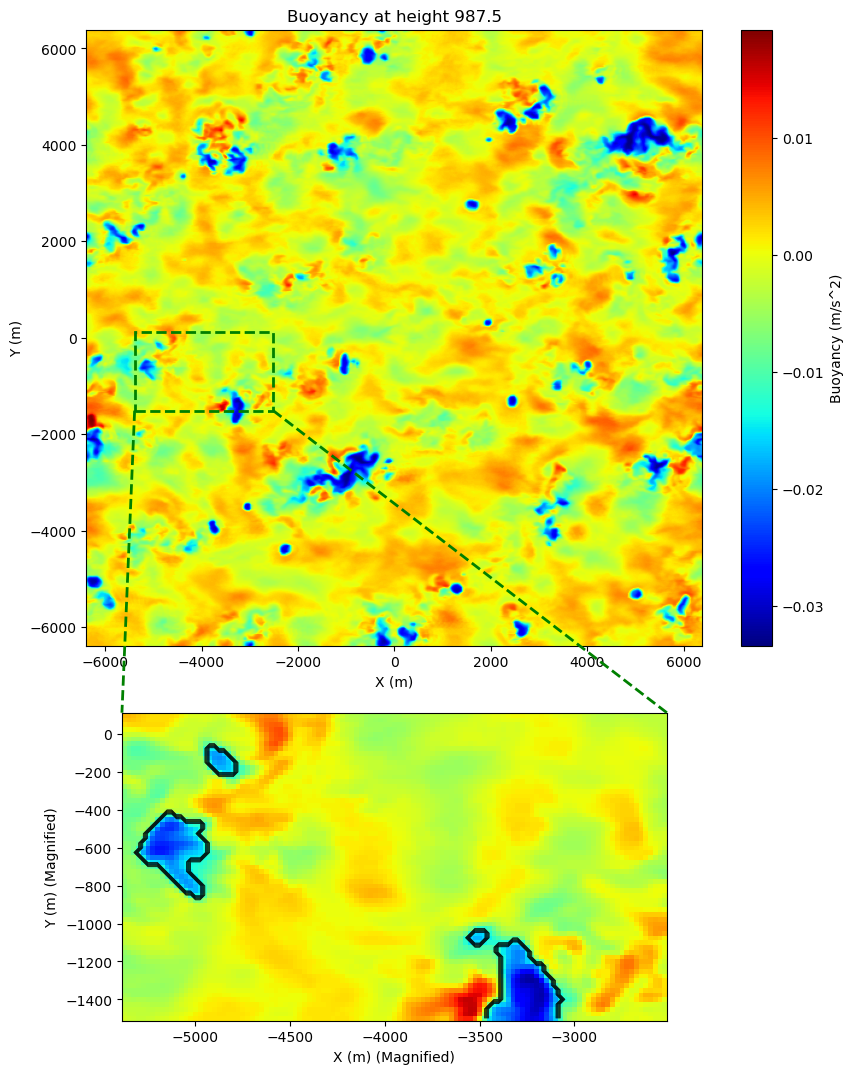

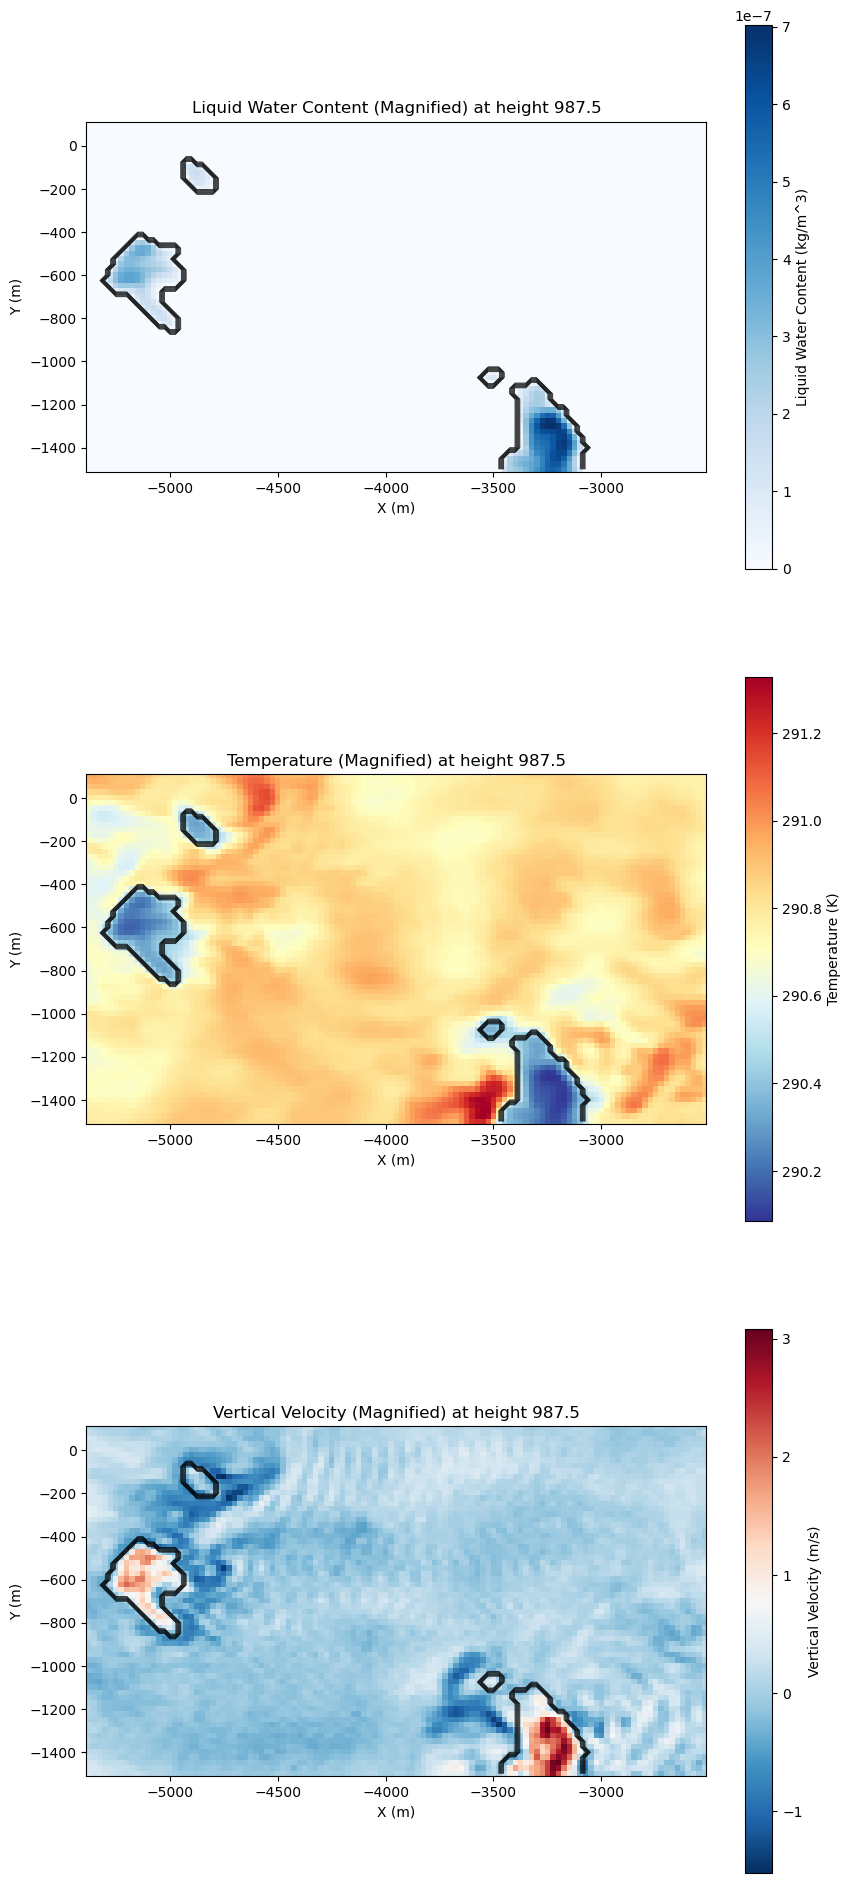

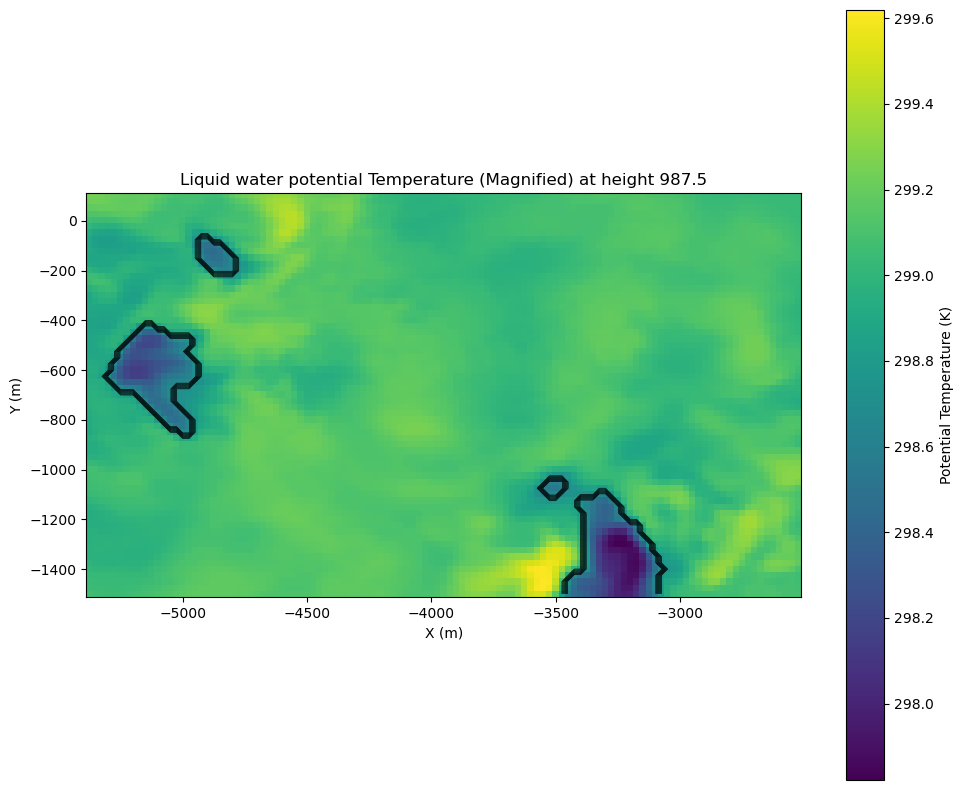

In [51]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def load_xy_values(filename):
    with nc.Dataset(filename) as ds:
        x_values = ds['xt'][:]
        y_values = ds['yt'][:]
    return x_values, y_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho

def calculate_buoyancy(density, cloud_mask, g):
    """Calculate buoyancy using the corrected equation."""
    buoyancy = np.zeros_like(density)
    for z in range(density.shape[0]):
        # Calculate the mean density of the environment (outside clouds)
        env_density_mean = np.mean(density[z, ~cloud_mask[z, :, :]])
        
        # Ensure that the environment density is valid
        if np.isnan(env_density_mean):
            continue
        
        # Calculate buoyancy for each point in the field
        buoyancy[z, :, :] = g * (env_density_mean - density[z, :, :]) / env_density_mean
    
    return buoyancy

# Specify the timestep to analyze
timestep = 35

# Load the data
theta_l_data = load_data_all_levels(t_file, 't', timestep)
p_data = load_data_all_levels(p_file, 'p', timestep)
q_t_data = load_data_all_levels(q_file, 'q', timestep)
q_l_data = load_data_all_levels(l_file, 'l', timestep)
q_v_data = q_t_data - q_l_data
w_data = load_data_all_levels(w_file, 'w', timestep)

# Load the x and y coordinate values
x_values, y_values = load_xy_values(t_file)

# Calculate temperature and density
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

# Define cloud mask based on liquid water content threshold
cloud_threshold = 10e-9
cloud_mask = q_l_data > cloud_threshold

# Calculate buoyancy
buoyancy_data = calculate_buoyancy(density_data, cloud_mask, g)

# Plot the buoyancy at a random height level as a heatmap
random_height_level = 40
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(f'Buoyancy at height {zt_values[random_height_level]}')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
cax = ax.imshow(buoyancy_data[random_height_level, :, :], cmap='jet', origin='lower',
                extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]])
colorbar = fig.colorbar(cax, ax=ax, label='Buoyancy (m/s^2)')

# Set the color bar limits to be the same
vmin, vmax = cax.get_clim()

# Define the region to magnify
x_start_idx, x_end_idx = 40, 155
y_start_idx, y_end_idx = 195, 260

x_start, x_end = x_values[x_start_idx], x_values[x_end_idx]
y_start, y_end = y_values[y_start_idx], y_values[y_end_idx]

# Plot the magnified buoyancy area below the main plot
axins = inset_axes(ax, width="100%", height="50%", loc='lower center', borderpad=-27.0)
axins.imshow(buoyancy_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='jet', origin='lower',
             vmin=vmin, vmax=vmax, extent=[x_start, x_end, y_start, y_end])
axins.set_xlabel('X (m) (Magnified)')
axins.set_ylabel('Y (m) (Magnified)')

# Draw the black line at the cloud edges on the inset plot
cloud_edges = (cloud_mask[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx])
axins.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

# Draw the white square on the main plot
rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, linewidth=2, edgecolor='green', facecolor='none', linestyle="--")
ax.add_patch(rect)

# Get the corners of the white square in data coordinates
corners_main = [(x_start, y_start), (x_end, y_start)]

# Get the corners of the magnified plot in axes coordinates (0, 1)
corners_inset = [(0, 1), (1, 1)]

# Convert the inset corners from axes coordinates to display coordinates
fig.canvas.draw()
trans_inset = axins.transAxes + fig.transFigure.inverted()
corners_inset_disp = trans_inset.transform(corners_inset)

# Convert the main corners from data coordinates to display coordinates
trans_main = ax.transData + fig.transFigure.inverted()
corners_main_disp = trans_main.transform(corners_main)

# Draw lines connecting the main plot to the magnified plot
for (x_main, y_main), (x_inset, y_inset) in zip(corners_main_disp, corners_inset_disp):
    line = plt.Line2D(
        [x_main, x_inset],
        [y_main, y_inset],
        transform=fig.transFigure,
        color="green", linestyle="--", linewidth=2
    )
    fig.lines.append(line)

# Additional plots for the magnified region
fig, (ax2, ax3, ax4) = plt.subplots(3, 1, figsize=(10, 24))

# Liquid Water Content
ax2.set_title(f'Liquid Water Content (Magnified) at height {zt_values[random_height_level]}')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
cax2 = ax2.imshow(q_l_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='Blues', origin='lower',
                  extent=[x_start, x_end, y_start, y_end])
colorbar2 = fig.colorbar(cax2, ax=ax2, label='Liquid Water Content (kg/m^3)')
ax2.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

# Temperature
ax3.set_title(f'Temperature (Magnified) at height {zt_values[random_height_level]}')
ax3.set_xlabel('X (m)')
ax3.set_ylabel('Y (m)')
cax3 = ax3.imshow(T_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='RdYlBu_r', origin='lower',
                  extent=[x_start, x_end, y_start, y_end])
colorbar3 = fig.colorbar(cax3, ax=ax3, label='Temperature (K)')
ax3.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

# Vertical Velocity
ax4.set_title(f'Vertical Velocity (Magnified) at height {zt_values[random_height_level]}')
ax4.set_xlabel('X (m)')
ax4.set_ylabel('Y (m)')
cax4 = ax4.imshow(w_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='RdBu_r', origin='lower',
                  extent=[x_start, x_end, y_start, y_end])
colorbar4 = fig.colorbar(cax4, ax=ax4, label='Vertical Velocity (m/s)')
ax4.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])


# Additional plot for theta_l (Potential Temperature)
fig, ax5 = plt.subplots(figsize=(10, 8))
ax5.set_title(f'Liquid water potential Temperature (Magnified) at height {zt_values[random_height_level]}')
ax5.set_xlabel('X (m)')
ax5.set_ylabel('Y (m)')
cax5 = ax5.imshow(theta_l_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='viridis', origin='lower',
                  extent=[x_start, x_end, y_start, y_end])
colorbar5 = fig.colorbar(cax5, ax=ax5, label='Potential Temperature (K)')
ax5.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

plt.tight_layout()
plt.show()



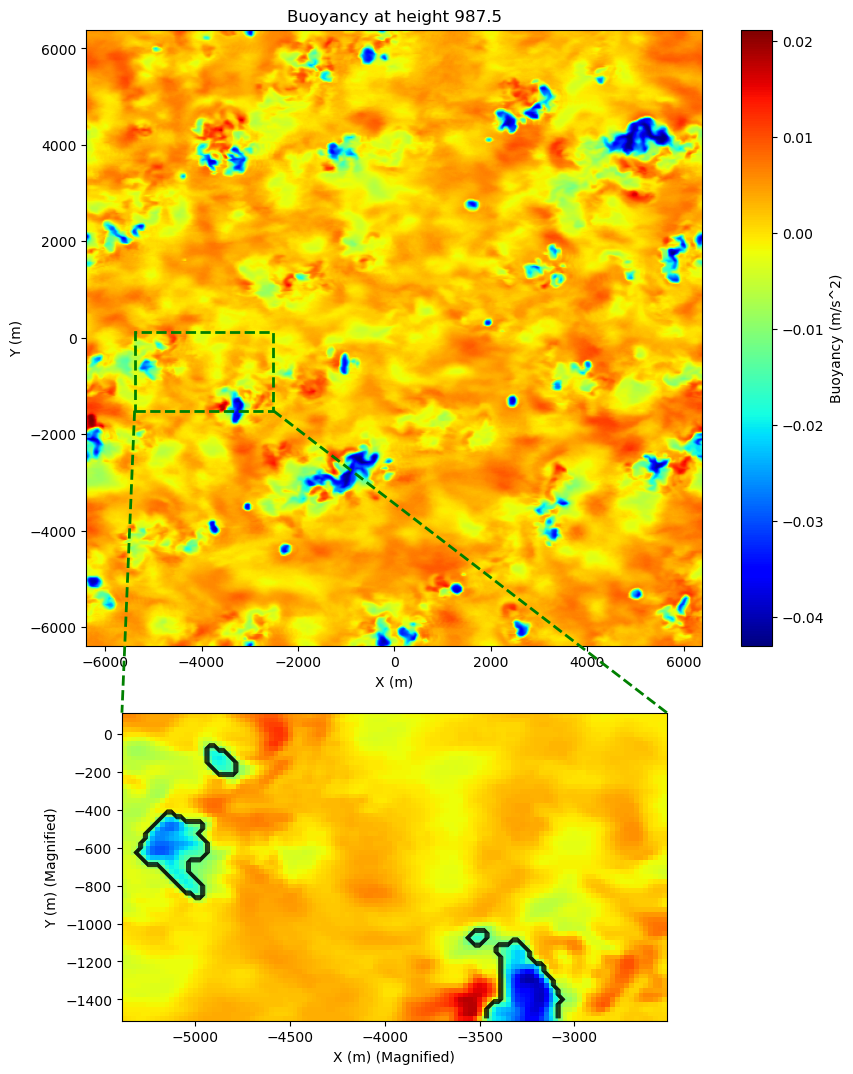

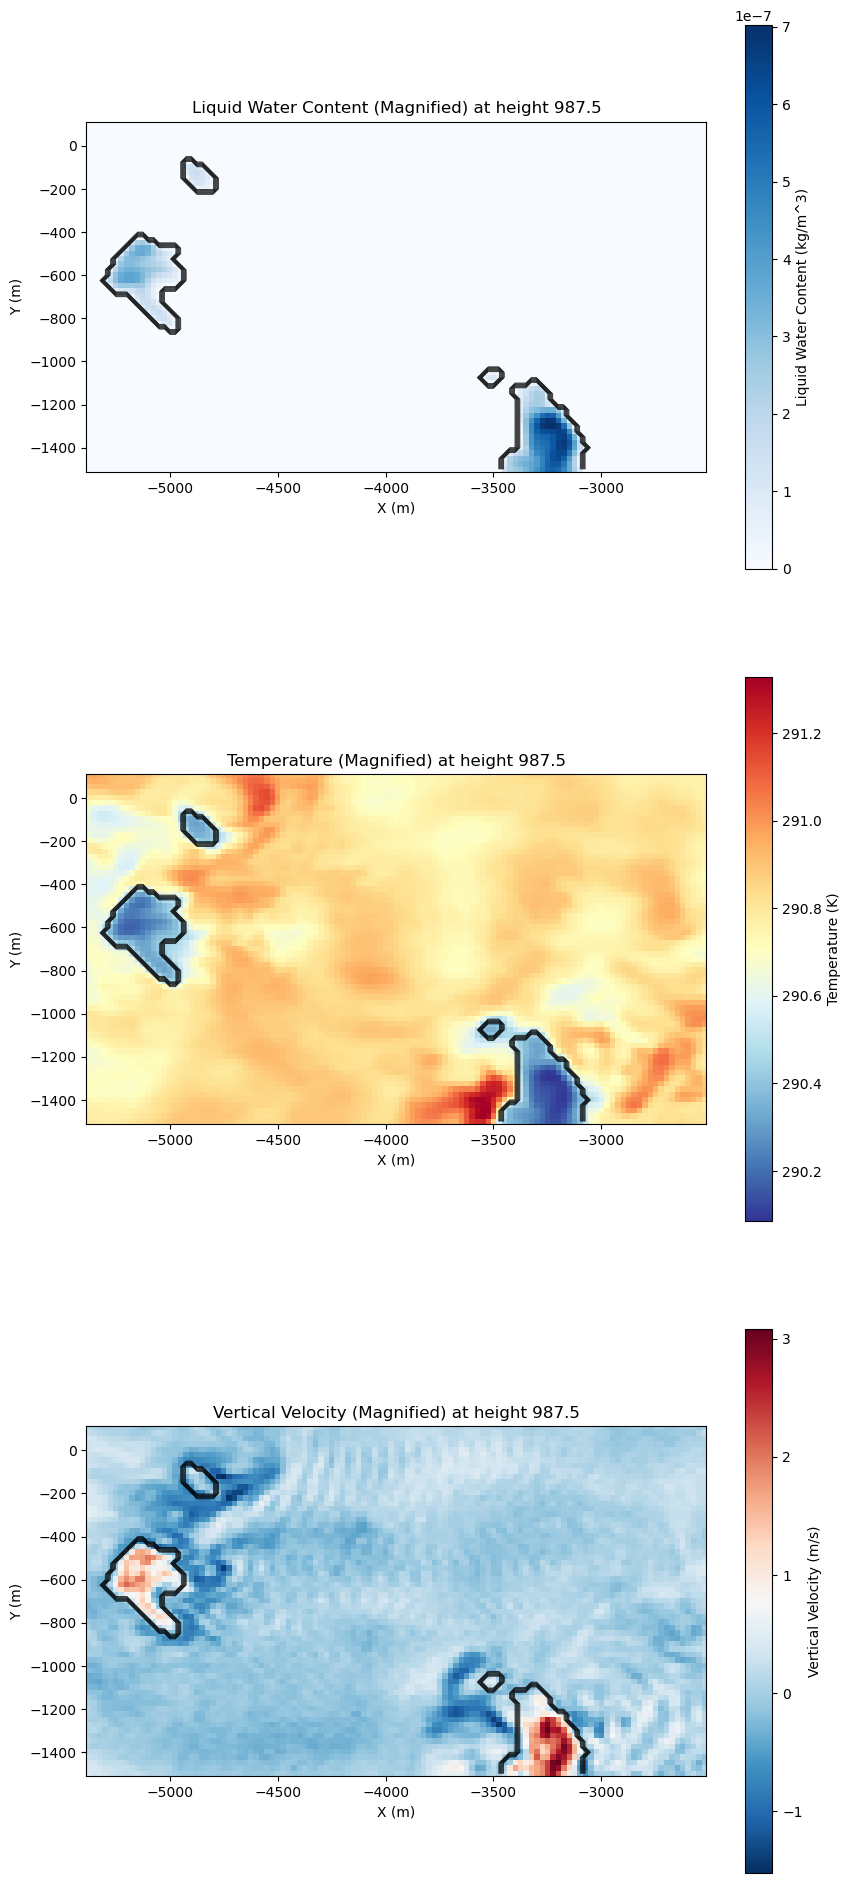

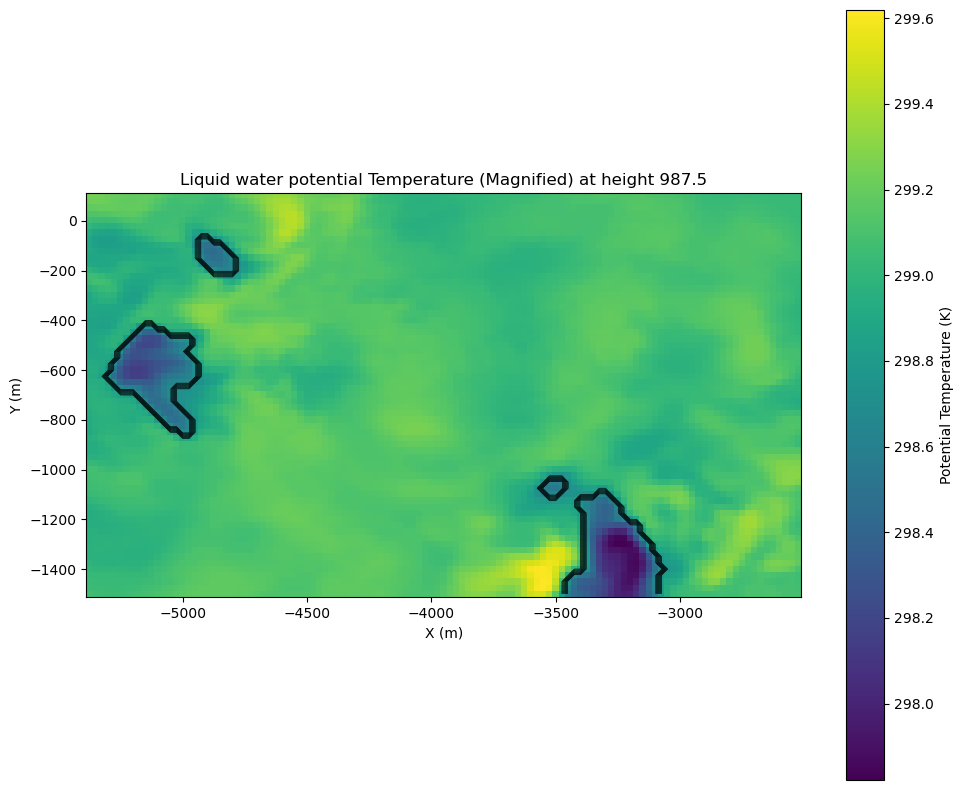

In [52]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def load_xy_values(filename):
    with nc.Dataset(filename) as ds:
        x_values = ds['xt'][:]
        y_values = ds['yt'][:]
    return x_values, y_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho








def calculate_virtual_potential_temperature(theta_l, q_v, q_l):
    """Calculate virtual potential temperature from liquid water potential temperature, water vapor, and liquid water mixing ratios."""
    theta_v = theta_l * (1 + 0.61 * q_v - q_l)
    return theta_v

def calculate_buoyancy_virtual(t_file, q_file, l_file, cloud_mask, timestep, g):
    """
    Calculate buoyancy using the virtual potential temperature approach, with theta_ref calculated at timestep 1.
    """
    
    theta_l = load_data_all_levels(t_file, 't', timestep)
    q_t = load_data_all_levels(q_file, 'q', timestep)
    q_l = load_data_all_levels(l_file, 'l', timestep)
    q_v = q_t - q_l

    # Calculate virtual potential temperature for the current timestep
    theta_v = calculate_virtual_potential_temperature(theta_l, q_v, q_l)

    # Load data for timestep 1 to calculate the reference virtual potential temperature
    theta_l_initial = load_data_all_levels(t_file, 't', 0)  # Timestep 1 (index 0)
    q_t_initial = load_data_all_levels(q_file, 'q', 0)
    q_l_initial = load_data_all_levels(l_file, 'l', 0)

    # Estimate water vapor mixing ratio for timestep 1 (assuming q_v = q_t - q_l)
    q_v_initial = q_t_initial - q_l_initial

    # Calculate virtual potential temperature for timestep 1 (reference state)
    theta_ref = calculate_virtual_potential_temperature(theta_l_initial, q_v_initial, q_l_initial)

    # Compute the mean theta_ref for each vertical level (mean over horizontal dimensions)
    theta_ref_mean = np.mean(theta_ref, axis=(1, 2))  # Mean for each level

    # Now calculate the buoyancy using virtual potential temperature and reference from timestep 1
    buoyancy = np.zeros_like(theta_v)
    for z in range(theta_v.shape[0]):
        # Use the precomputed reference virtual potential temperature from timestep 1 for each vertical level
        buoyancy[z, :, :] = g * (theta_v[z, :, :] - theta_ref_mean[z]) / theta_ref_mean[z]
    
    return buoyancy






# Specify the timestep to analyze
timestep = 35

# Load the data
theta_l_data = load_data_all_levels(t_file, 't', timestep)
p_data = load_data_all_levels(p_file, 'p', timestep)
q_t_data = load_data_all_levels(q_file, 'q', timestep)
q_l_data = load_data_all_levels(l_file, 'l', timestep)
q_v_data = q_t_data - q_l_data
w_data = load_data_all_levels(w_file, 'w', timestep)

# Load the x and y coordinate values
x_values, y_values = load_xy_values(t_file)

# Calculate temperature and density
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

# Define cloud mask based on liquid water content threshold
cloud_threshold = 10e-9
cloud_mask = q_l_data > cloud_threshold

# Calculate buoyancy
buoyancy_data = calculate_buoyancy_virtual(t_file, q_file, l_file, cloud_mask, timestep, g)

# Plot the buoyancy at a random height level as a heatmap
random_height_level = 40
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(f'Buoyancy at height {zt_values[random_height_level]}')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
cax = ax.imshow(buoyancy_data[random_height_level, :, :], cmap='jet', origin='lower',
                extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]])
colorbar = fig.colorbar(cax, ax=ax, label='Buoyancy (m/s^2)')

# Set the color bar limits to be the same
vmin, vmax = cax.get_clim()

# Define the region to magnify
x_start_idx, x_end_idx = 40, 155
y_start_idx, y_end_idx = 195, 260

x_start, x_end = x_values[x_start_idx], x_values[x_end_idx]
y_start, y_end = y_values[y_start_idx], y_values[y_end_idx]

# Plot the magnified buoyancy area below the main plot
axins = inset_axes(ax, width="100%", height="50%", loc='lower center', borderpad=-27.0)
axins.imshow(buoyancy_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='jet', origin='lower',
             vmin=vmin, vmax=vmax, extent=[x_start, x_end, y_start, y_end])
axins.set_xlabel('X (m) (Magnified)')
axins.set_ylabel('Y (m) (Magnified)')

# Draw the black line at the cloud edges on the inset plot
cloud_edges = (cloud_mask[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx])
axins.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

# Draw the white square on the main plot
rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, linewidth=2, edgecolor='green', facecolor='none', linestyle="--")
ax.add_patch(rect)

# Get the corners of the white square in data coordinates
corners_main = [(x_start, y_start), (x_end, y_start)]

# Get the corners of the magnified plot in axes coordinates (0, 1)
corners_inset = [(0, 1), (1, 1)]

# Convert the inset corners from axes coordinates to display coordinates
fig.canvas.draw()
trans_inset = axins.transAxes + fig.transFigure.inverted()
corners_inset_disp = trans_inset.transform(corners_inset)

# Convert the main corners from data coordinates to display coordinates
trans_main = ax.transData + fig.transFigure.inverted()
corners_main_disp = trans_main.transform(corners_main)

# Draw lines connecting the main plot to the magnified plot
for (x_main, y_main), (x_inset, y_inset) in zip(corners_main_disp, corners_inset_disp):
    line = plt.Line2D(
        [x_main, x_inset],
        [y_main, y_inset],
        transform=fig.transFigure,
        color="green", linestyle="--", linewidth=2
    )
    fig.lines.append(line)

# Additional plots for the magnified region
fig, (ax2, ax3, ax4) = plt.subplots(3, 1, figsize=(10, 24))

# Liquid Water Content
ax2.set_title(f'Liquid Water Content (Magnified) at height {zt_values[random_height_level]}')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
cax2 = ax2.imshow(q_l_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='Blues', origin='lower',
                  extent=[x_start, x_end, y_start, y_end])
colorbar2 = fig.colorbar(cax2, ax=ax2, label='Liquid Water Content (kg/m^3)')
ax2.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

# Temperature
ax3.set_title(f'Temperature (Magnified) at height {zt_values[random_height_level]}')
ax3.set_xlabel('X (m)')
ax3.set_ylabel('Y (m)')
cax3 = ax3.imshow(T_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='RdYlBu_r', origin='lower',
                  extent=[x_start, x_end, y_start, y_end])
colorbar3 = fig.colorbar(cax3, ax=ax3, label='Temperature (K)')
ax3.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

# Vertical Velocity
ax4.set_title(f'Vertical Velocity (Magnified) at height {zt_values[random_height_level]}')
ax4.set_xlabel('X (m)')
ax4.set_ylabel('Y (m)')
cax4 = ax4.imshow(w_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='RdBu_r', origin='lower',
                  extent=[x_start, x_end, y_start, y_end])
colorbar4 = fig.colorbar(cax4, ax=ax4, label='Vertical Velocity (m/s)')
ax4.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])


# Additional plot for theta_l (Potential Temperature)
fig, ax5 = plt.subplots(figsize=(10, 8))
ax5.set_title(f'Liquid water potential Temperature (Magnified) at height {zt_values[random_height_level]}')
ax5.set_xlabel('X (m)')
ax5.set_ylabel('Y (m)')
cax5 = ax5.imshow(theta_l_data[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='viridis', origin='lower',
                  extent=[x_start, x_end, y_start, y_end])
colorbar5 = fig.colorbar(cax5, ax=ax5, label='Potential Temperature (K)')
ax5.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

plt.tight_layout()
plt.show()



## Difference between the old and the new

/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_67484/2035886345.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


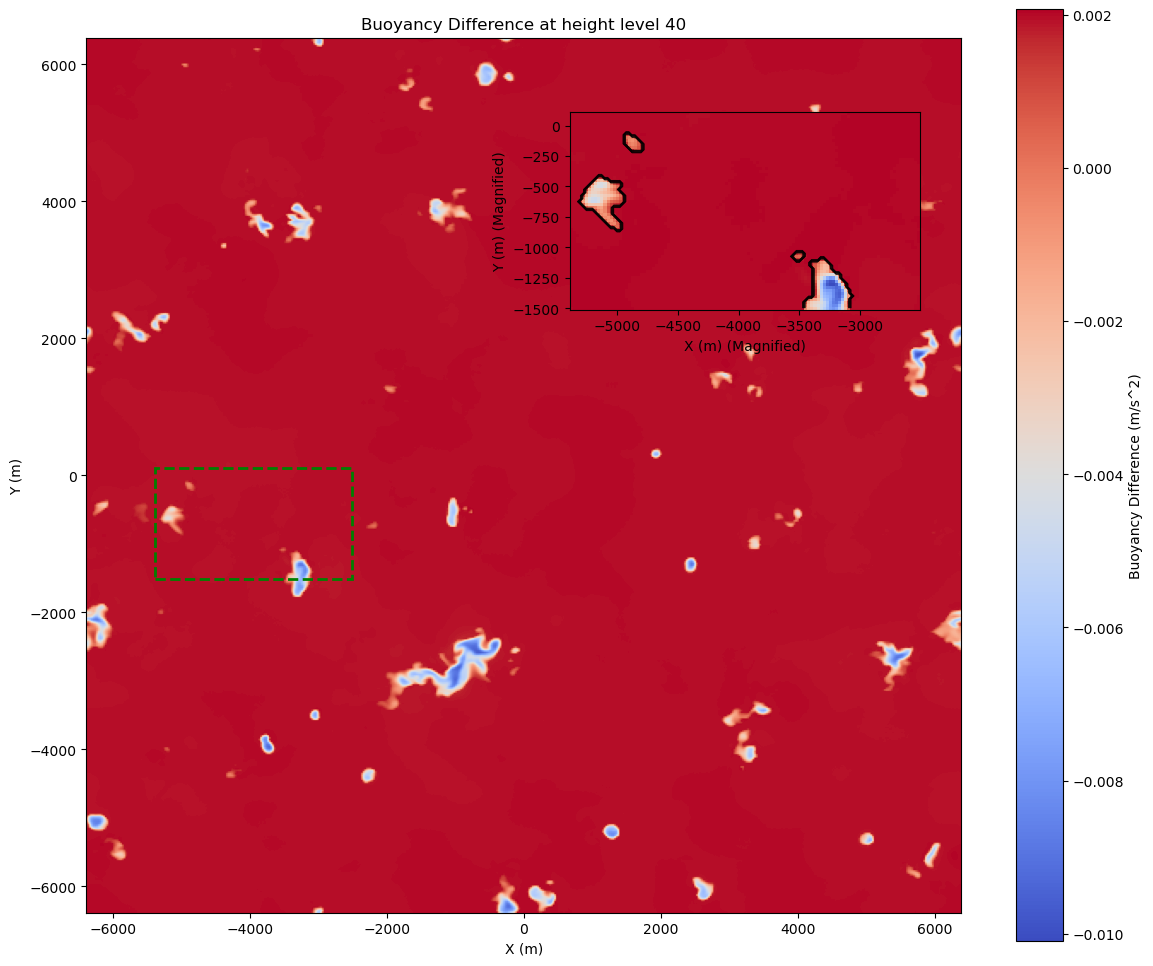

In [58]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_xy_values(filename):
    with nc.Dataset(filename) as ds:
        x_values = ds['xt'][:]
        y_values = ds['yt'][:]
    return x_values, y_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho

def calculate_buoyancy_virtual(t_file, q_file, l_file, cloud_mask, timestep, g):
    """
    Calculate buoyancy using the virtual potential temperature approach, with theta_ref calculated at timestep 1.
    """
    theta_l = load_data_all_levels(t_file, 't', timestep)
    q_t = load_data_all_levels(q_file, 'q', timestep)
    q_l = load_data_all_levels(l_file, 'l', timestep)
    q_v = q_t - q_l

    # Calculate virtual potential temperature for the current timestep
    theta_v = theta_l * (1 + 0.61 * q_v - q_l)

    # Load data for timestep 1 to calculate the reference virtual potential temperature
    theta_l_initial = load_data_all_levels(t_file, 't', 0)  # Timestep 1 (index 0)
    q_t_initial = load_data_all_levels(q_file, 'q', 0)
    q_l_initial = load_data_all_levels(l_file, 'l', 0)
    q_v_initial = q_t_initial - q_l_initial

    # Calculate virtual potential temperature for timestep 1 (reference state)
    theta_ref = theta_l_initial * (1 + 0.61 * q_v_initial - q_l_initial)

    # Compute the mean theta_ref for each vertical level (mean over horizontal dimensions)
    theta_ref_mean = np.mean(theta_ref, axis=(1, 2))  # Mean for each level

    # Now calculate the buoyancy using virtual potential temperature and reference from timestep 1
    buoyancy = np.zeros_like(theta_v)
    for z in range(theta_v.shape[0]):
        buoyancy[z, :, :] = g * (theta_v[z, :, :] - theta_ref_mean[z]) / theta_ref_mean[z]
    
    return buoyancy

def calculate_buoyancy(density, cloud_mask, g):
    """Calculate buoyancy using the corrected equation based on density."""
    buoyancy = np.zeros_like(density)
    for z in range(density.shape[0]):
        # Calculate the mean density of the environment (outside clouds)
        env_density_mean = np.mean(density[z, ~cloud_mask[z, :, :]])
        
        # Ensure that the environment density is valid
        if np.isnan(env_density_mean):
            continue
        
        # Calculate buoyancy for each point in the field
        buoyancy[z, :, :] = g * (env_density_mean - density[z, :, :]) / env_density_mean
    
    return buoyancy

# Specify the timestep to analyze
timestep = 35

# Load the data
theta_l_data = load_data_all_levels(t_file, 't', timestep)
p_data = load_data_all_levels(p_file, 'p', timestep)
q_t_data = load_data_all_levels(q_file, 'q', timestep)
q_l_data = load_data_all_levels(l_file, 'l', timestep)
q_v_data = q_t_data - q_l_data

# Load the x and y coordinate values
x_values, y_values = load_xy_values(t_file)

# Calculate temperature and density
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

# Define cloud mask based on liquid water content threshold
cloud_threshold = 10e-9
cloud_mask = q_l_data > cloud_threshold

# Calculate buoyancy using both methods
buoyancy_virtual = calculate_buoyancy_virtual(t_file, q_file, l_file, cloud_mask, timestep, g)
buoyancy_old = calculate_buoyancy(density_data, cloud_mask, g)

# Calculate the difference between the two buoyancy calculations
buoyancy_difference = buoyancy_virtual - buoyancy_old

# Plot the difference at a random height level as a heatmap
random_height_level = 40
fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size to allow more room
ax.set_title(f'Buoyancy Difference at height level {random_height_level}')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
cax = ax.imshow(buoyancy_difference[random_height_level, :, :], cmap='coolwarm', origin='lower',
                extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]])
colorbar = fig.colorbar(cax, ax=ax, label='Buoyancy Difference (m/s^2)')

# Define the region to magnify
x_start_idx, x_end_idx = 40, 155
y_start_idx, y_end_idx = 195, 260
x_start, x_end = x_values[x_start_idx], x_values[x_end_idx]
y_start, y_end = y_values[y_start_idx], y_values[y_end_idx]

# Plot the magnified buoyancy difference area
axins = inset_axes(ax, width="40%", height="30%", loc='upper right', borderpad=3.0)  # Change position to 'upper right'
axins.imshow(buoyancy_difference[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx], cmap='coolwarm', origin='lower',
             extent=[x_start, x_end, y_start, y_end])
axins.set_xlabel('X (m) (Magnified)')
axins.set_ylabel('Y (m) (Magnified)')

# Draw the black line at the cloud edges on the inset plot
cloud_edges = (cloud_mask[random_height_level, y_start_idx:y_end_idx, x_start_idx:x_end_idx])
axins.contour(cloud_edges, colors='black', linewidths=0.5, origin='lower', extent=[x_start, x_end, y_start, y_end])

# Draw the green rectangle on the main plot
rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, linewidth=2, edgecolor='green', facecolor='none', linestyle="--")
ax.add_patch(rect)

# Save the figure as a PDF with tight bounding box to avoid clipping
plt.tight_layout()
plt.savefig('buoyancy_difference_plot_fixed_position.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()



# Near vs mean environment
How different is the local (near) environment to the mean environment?

## Finding clouds' neighbouring points

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt, binary_erosion

# Assuming we are working with height level 45
height_level = 45

# Define the region of interest
x_start, x_end = 40, 155
y_start, y_end = 195, 260

# Extract the region of interest
region_cloud_mask = cloud_mask[height_level, y_start:y_end, x_start:x_end]

# Identify cloud edge points using ndimage.binary_erosion
eroded_cloud_mask = binary_erosion(region_cloud_mask)
cloud_edge_mask = region_cloud_mask & ~eroded_cloud_mask

# Initialize an array to mark already occupied points
occupied_mask = np.zeros_like(region_cloud_mask, dtype=bool)

# Initialize the plot
plt.figure(figsize=(10, 7))
plt.title(f'Cloud Edge and Neighboring Points')

# Plot cloud edge points
cloud_edge_y, cloud_edge_x = np.where(cloud_edge_mask)
plt.scatter(cloud_edge_x + x_start, cloud_edge_y + y_start, color='red', s=10, label='Cloud Edge')

# Define colors and labels for each distance level
colors = ['blue', 'green', 'purple']
labels = ['1st Distance Neighbors', '2nd Distance Neighbors', '3rd Distance Neighbors']

# Compute Manhattan distance from cloud edge using distance_transform_cdt
distance_from_edge = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

# Plot points at specific distances from the cloud edge, ensuring they are not cloud points and not overlapping
for i, distance in enumerate(range(1, 4)):
    neighbors_y, neighbors_x = np.where((distance_from_edge == distance) & (~region_cloud_mask) & (~occupied_mask))
    
    # Mark these points as occupied
    occupied_mask[neighbors_y, neighbors_x] = True
    
    # Plot the valid neighbors
    plt.scatter(neighbors_x + x_start, neighbors_y + y_start, color=colors[i], s=10, label=labels[i])

# Set plot limits to the region of interest
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.xlabel('X (grid points)')
plt.ylabel('Y (grid points)')

# Add a legend
plt.legend()
plt.show()


# Variable comparison plot: cloud and near environment

Following the work by Heus and Jonker (2008), normalise the cloud's lengths and distance away from cloud. Also include inside of the clouds. 

12
13


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_67484/320384325.py:172: RuntimeWarning: Mean of empty slice
  mean_buoyancy_vs_distance = np.nanmean(all_buoyancy_vs_distance, axis=0)


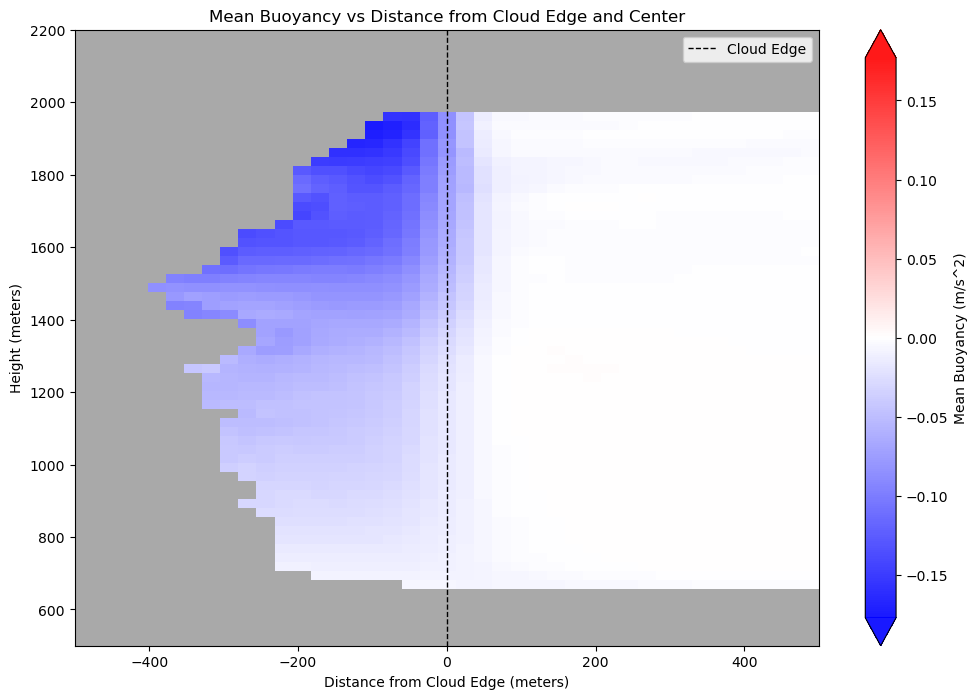

In [60]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt
from matplotlib.colors import Normalize, ListedColormap

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity
horizontal_resolution = 25  # Horizontal resolution in meters

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho

def calculate_buoyancy(density, cloud_mask, g):
    """Calculate buoyancy using the corrected equation."""
    buoyancy = np.zeros_like(density)
    for z in range(density.shape[0]):
        # Calculate the mean density of the environment (outside clouds)
        env_density_mean = np.mean(density[z, ~cloud_mask[z, :, :]])
        
        # Ensure that the environment density is valid
        if np.isnan(env_density_mean):
            continue
        
        # Calculate buoyancy for each point in the field
        buoyancy[z, :, :] = g * (env_density_mean - density[z, :, :]) / env_density_mean
    
    return buoyancy



def calculate_virtual_potential_temperature(theta_l, q_v, q_l):
    """Calculate virtual potential temperature from liquid water potential temperature, water vapor, and liquid water mixing ratios."""
    theta_v = theta_l * (1 + 0.61 * q_v - q_l)
    return theta_v

def calculate_buoyancy_virtual(t_file, q_file, l_file, cloud_mask, timestep, g):
    """
    Calculate buoyancy using the virtual potential temperature approach, with theta_ref calculated at timestep 1.
    sample usage: calculate_buoyancy_virtual(t_file, q_file, l_file, cloud_mask, timestep, g)
    """
    theta_l = load_data_all_levels(t_file, 't', timestep)
    q_t = load_data_all_levels(q_file, 'q', timestep)
    q_l = load_data_all_levels(l_file, 'l', timestep)
    q_v = q_t - q_l
    theta_v = calculate_virtual_potential_temperature(theta_l, q_v, q_l)

    # Load data for timestep 1 to calculate the reference virtual potential temperature
    theta_l_initial = load_data_all_levels(t_file, 't', 0)  # Timestep 1 (index 0)
    q_t_initial = load_data_all_levels(q_file, 'q', 0)
    q_l_initial = load_data_all_levels(l_file, 'l', 0)
    q_v_initial = q_t_initial - q_l_initial
    theta_ref = calculate_virtual_potential_temperature(theta_l_initial, q_v_initial, q_l_initial)
    theta_ref_mean = np.mean(theta_ref, axis=(1, 2))  # Mean for each level

    buoyancy = np.zeros_like(theta_v)
    for z in range(theta_v.shape[0]):
        buoyancy[z, :, :] = g * (theta_v[z, :, :] - theta_ref_mean[z]) / theta_ref_mean[z]
    
    return buoyancy






def calculate_buoyancy_vs_distance_with_edge(buoyancy_data, cloud_mask, max_distance):
    """Calculate buoyancy as a function of distance from cloud center and edge, including explicit cloud edge detection."""
    height_levels = buoyancy_data.shape[0]
    total_distance = max_distance * 2 + 1  # max_distance inward + max_distance outward + 1 for center
    buoyancy_vs_distance = np.full((height_levels, total_distance), np.nan)

    for z in range(height_levels):
        region_cloud_mask = cloud_mask[z]

        # Only proceed if there are clouds at this height level
        if np.any(region_cloud_mask):
            # Compute Manhattan distance from cloud edge outward
            distance_outward = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

            # Compute Manhattan distance from cloud edge inward
            distance_inward = distance_transform_cdt(region_cloud_mask, metric='taxicab')

            # Combine distances: positive for outward, negative for inward, and 0 for the cloud edge
            distances = np.full(region_cloud_mask.shape, np.nan)  # Initialize with NaN
            distances[region_cloud_mask] = -distance_inward[region_cloud_mask]
            distances[~region_cloud_mask] = distance_outward[~region_cloud_mask]

            # Explicitly find the cloud edge: where cloud_mask transitions from True to False
            cloud_edges = (region_cloud_mask[:, :-1] & ~region_cloud_mask[:, 1:]) | (~region_cloud_mask[:, :-1] & region_cloud_mask[:, 1:])
            edge_indices = np.where(cloud_edges)
            
            # Set distances at the cloud edge to 0
            distances[edge_indices] = 0

            # Calculate buoyancy for each distance, including cloud edge (distance == 0)
            for distance in range(-max_distance, max_distance + 1):
                indices = np.where(distances == distance)

                if len(indices[0]) > 0:
                    buoyancy_vs_distance[z, distance + max_distance] = np.mean(buoyancy_data[z, indices[0], indices[1]])

    return buoyancy_vs_distance

# Modify process_multiple_timesteps to use the new function and filter for valid cloud levels
def process_multiple_timesteps_with_edge(timesteps, max_distance):
    all_buoyancy_vs_distance = []

    for timestep in timesteps:
        # Load the data
        print(timestep)
        theta_l_data = load_data_all_levels(t_file, 't', timestep)
        p_data = load_data_all_levels(p_file, 'p', timestep)
        q_t_data = load_data_all_levels(q_file, 'q', timestep)
        q_l_data = load_data_all_levels(l_file, 'l', timestep)
        q_v_data = q_t_data - q_l_data

        # Create a cloud mask based on the liquid water threshold
        cloud_mask = q_l_data > 10e-8

        # Calculate temperature and density
        T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
        density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

        # Calculate buoyancy
        #buoyancy_data = calculate_buoyancy(density_data, cloud_mask, g)
        buoyancy_data = calculate_buoyancy_virtual(t_file, q_file, l_file, cloud_mask, timestep, g)

        # Calculate buoyancy as a function of distance from cloud edge, and track cloud edge locations
        buoyancy_vs_distance = calculate_buoyancy_vs_distance_with_edge(buoyancy_data, cloud_mask, max_distance)
        all_buoyancy_vs_distance.append(buoyancy_vs_distance)

    # Average over all timesteps, ignoring levels without clouds
    mean_buoyancy_vs_distance = np.nanmean(all_buoyancy_vs_distance, axis=0)

    return mean_buoyancy_vs_distance

# Parameters for distance and resolution
timesteps = [12, 13]  # Example timesteps
max_distance_in_meters = 500  # Maximum distance from cloud edge in meters (user-defined)
max_distance = max_distance_in_meters // horizontal_resolution  # Convert distance from meters to grid points

# Run the calculation with cloud edge
mean_buoyancy_vs_distance = process_multiple_timesteps_with_edge(timesteps, max_distance)

# Create distances in meters (horizontal grid points * 25 meters)
distance_in_meters = np.arange(-max_distance, max_distance + 1) * horizontal_resolution

# Load height levels in meters
zt_values = load_zt_values(t_file)

# Plotting
plt.figure(figsize=(12, 8))
plt.title('Mean Buoyancy vs Distance from Cloud Edge and Center')
plt.xlabel('Distance from Cloud Edge (meters)')
plt.ylabel('Height (meters)')

# Create a masked array to highlight missing values in dark grey
masked_buoyancy = np.ma.masked_invalid(mean_buoyancy_vs_distance)

# Modify the colormap to include dark grey for masked values
cmap = plt.get_cmap('bwr')
cmap = cmap(np.arange(cmap.N))
cmap[:, -1] = 0.9  # Set alpha to 0.9 for all colors (transparency)
cmap = ListedColormap(cmap)
cmap.set_bad(color='darkgrey')

# Adjust the color bar to emphasize 0 buoyancy and highlight negatives
norm = Normalize(vmin=-np.nanmax(np.abs(mean_buoyancy_vs_distance)), vmax=np.nanmax(np.abs(mean_buoyancy_vs_distance)))

plt.imshow(masked_buoyancy, cmap=cmap, norm=norm, origin='lower', aspect='auto',
           extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]])
plt.colorbar(label='Mean Buoyancy (m/s^2)', extend='both')

# Mark the cloud edge on the plot (x = 0)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1, label='Cloud Edge')

plt.legend()
plt.ylim([500, 2200])
plt.xlim([-max_distance_in_meters, max_distance_in_meters])

plt.show()


## Calculating buoyancy using virtual potential temperature


## for all variables:

Processing timestep 2...
Processing timestep 3...
Processing timestep 4...
Processing timestep 5...
Processing timestep 6...
Processing timestep 7...
Processing timestep 8...
Processing timestep 9...
Processing timestep 10...
Processing timestep 11...
Processing timestep 12...
Processing timestep 13...
Processing timestep 14...
Processing timestep 15...
Processing timestep 16...
Processing timestep 17...
Processing timestep 18...
Processing timestep 19...
Processing timestep 20...
Processing timestep 21...
Processing timestep 22...
Processing timestep 23...
Processing timestep 24...
Processing timestep 25...
Processing timestep 26...
Processing timestep 27...
Processing timestep 28...
Processing timestep 29...
Processing timestep 30...
Processing timestep 31...
Processing timestep 32...
Processing timestep 33...
Processing timestep 34...


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_6323/672201125.py:163: RuntimeWarning: Mean of empty slice
  mean_results[key] = np.nanmean([result[key] for result in all_results], axis=0)  # Average for other variables


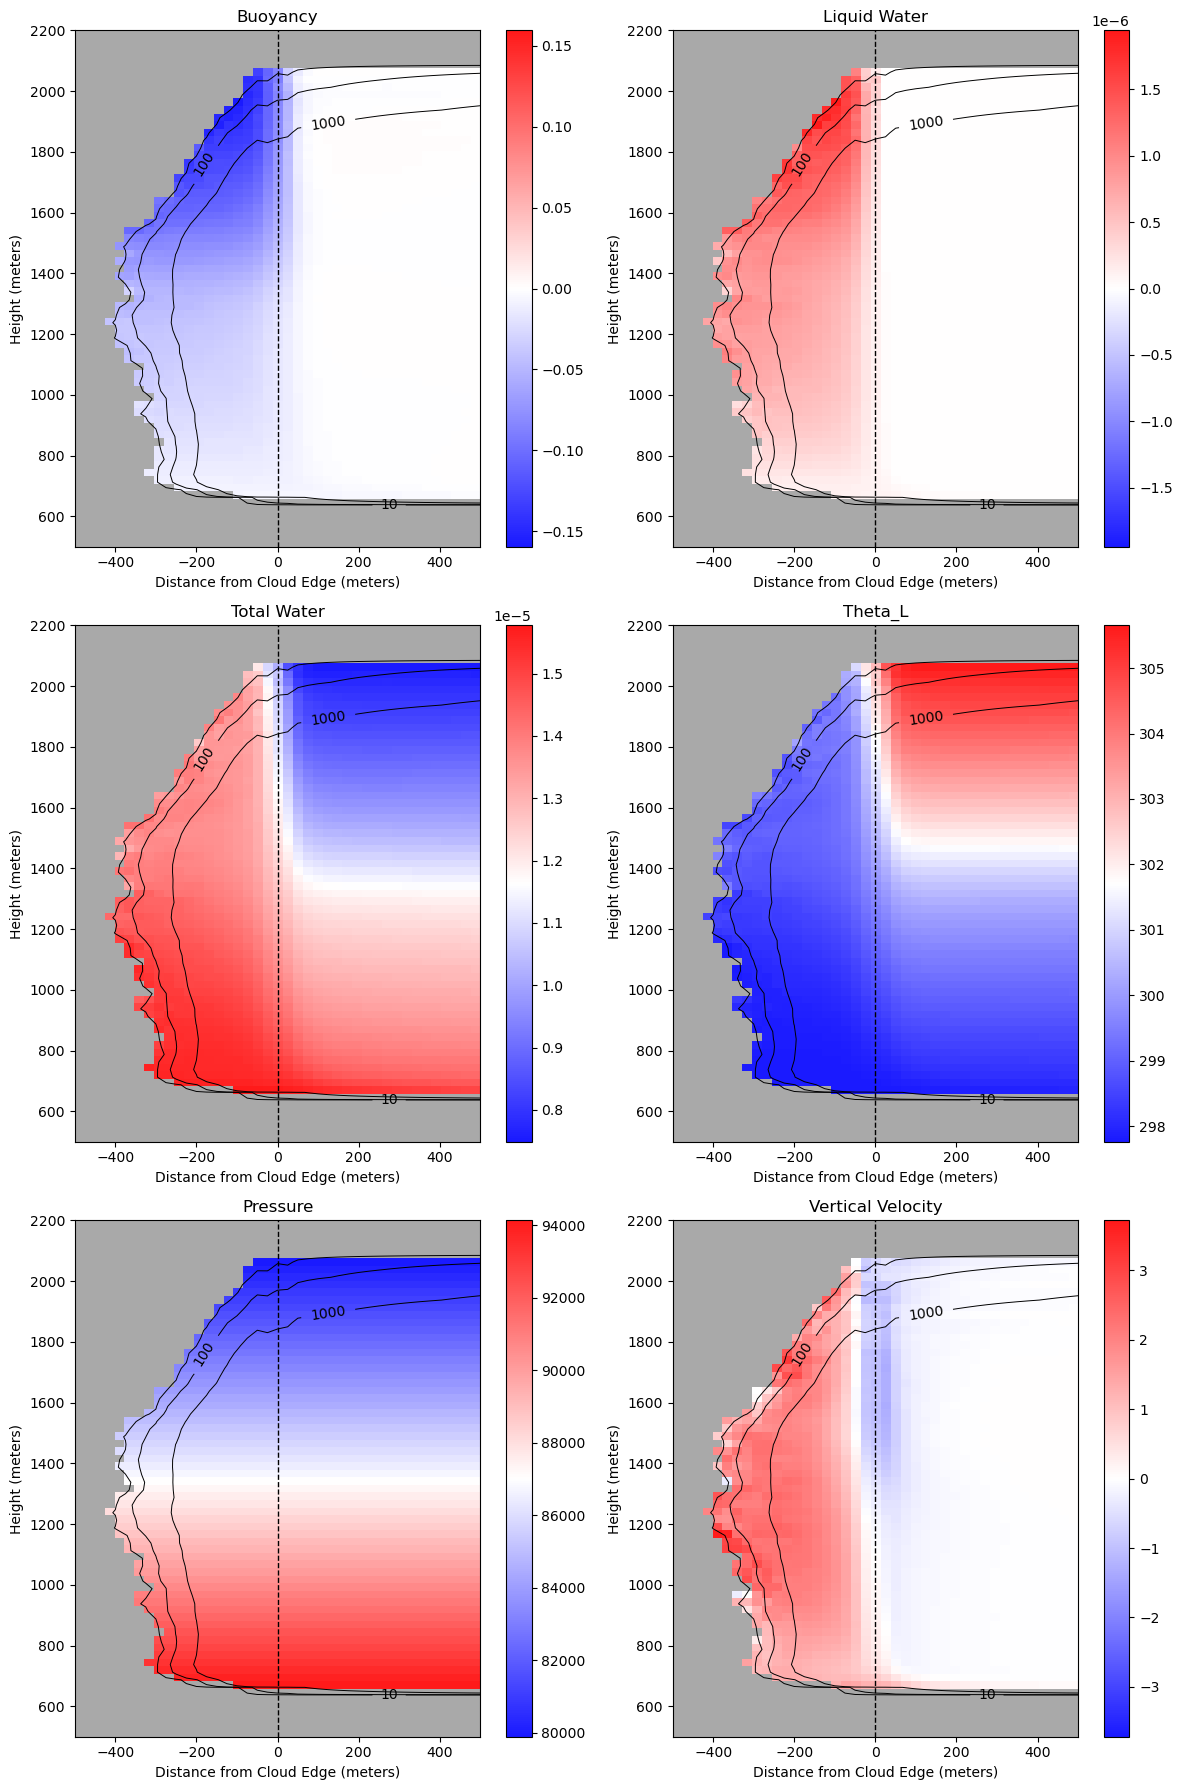

In [5]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt
from matplotlib.colors import Normalize, ListedColormap

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity
horizontal_resolution = 25  # Horizontal resolution in meters

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc' # Vertical velocity
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc' # Liquid water mixing ratio
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc' # Total water mixing ratio
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc' # Liquid Water Potential temperature
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc' # Pressure

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho

def calculate_buoyancy(density, cloud_mask, g):
    """Calculate buoyancy using the corrected equation."""
    buoyancy = np.zeros_like(density)
    for z in range(density.shape[0]):
        # Calculate the mean density of the environment (outside clouds)
        env_density_mean = np.mean(density[z, ~cloud_mask[z, :, :]])
        
        # Ensure that the environment density is valid
        if np.isnan(env_density_mean):
            continue
        
        # Calculate buoyancy for each point in the field
        buoyancy[z, :, :] = g * (env_density_mean - density[z, :, :]) / env_density_mean
    
    return buoyancy

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt
from matplotlib.colors import Normalize, ListedColormap

def calculate_values_vs_distance(buoyancy_data, liquid_water_data, total_water_data, theta_l_data, pressure_data, w_data, cloud_mask, max_distance):
    """Calculate values as a function of distance from cloud center and edge for various variables."""
    height_levels = buoyancy_data.shape[0]
    total_distance = max_distance * 2 + 1  # max_distance inward + max_distance outward + 1 for center
    results = {
        'buoyancy': np.full((height_levels, total_distance), np.nan),
        'liquid_water': np.full((height_levels, total_distance), np.nan),
        'total_water': np.full((height_levels, total_distance), np.nan),
        'theta_l': np.full((height_levels, total_distance), np.nan),
        'pressure': np.full((height_levels, total_distance), np.nan),
        'w': np.full((height_levels, total_distance), np.nan),
        'cloud_count': np.zeros((height_levels, total_distance), dtype=int)  # Track the number of cloud points contributing
    }

    for z in range(height_levels):
        region_cloud_mask = cloud_mask[z]

        # Only proceed if there are clouds at this height level
        if np.any(region_cloud_mask):
            # Compute Manhattan distance from cloud edge outward
            distance_outward = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

            # Compute Manhattan distance from cloud edge inward
            distance_inward = distance_transform_cdt(region_cloud_mask, metric='taxicab')

            # Combine distances: positive for outward, negative for inward, and 0 for the cloud edge
            distances = np.full(region_cloud_mask.shape, np.nan)  # Initialize with NaN
            distances[region_cloud_mask] = -distance_inward[region_cloud_mask]
            distances[~region_cloud_mask] = distance_outward[~region_cloud_mask]

            # Explicitly find the cloud edge: where cloud_mask transitions from True to False
            cloud_edges = (region_cloud_mask[:, :-1] & ~region_cloud_mask[:, 1:]) | (~region_cloud_mask[:, :-1] & region_cloud_mask[:, 1:])
            edge_indices = np.where(cloud_edges)
            
            # Set distances at the cloud edge to 0
            distances[edge_indices] = 0

            # Calculate each variable for each distance and count cloud points
            for distance in range(-max_distance, max_distance + 1):
                indices = np.where(distances == distance)

                if len(indices[0]) > 0:
                    results['buoyancy'][z, distance + max_distance] = np.mean(buoyancy_data[z, indices[0], indices[1]])
                    results['liquid_water'][z, distance + max_distance] = np.mean(liquid_water_data[z, indices[0], indices[1]])
                    results['total_water'][z, distance + max_distance] = np.mean(total_water_data[z, indices[0], indices[1]])
                    results['theta_l'][z, distance + max_distance] = np.mean(theta_l_data[z, indices[0], indices[1]])
                    results['pressure'][z, distance + max_distance] = np.mean(pressure_data[z, indices[0], indices[1]])
                    results['w'][z, distance + max_distance] = np.mean(w_data[z, indices[0], indices[1]])
                    
                    # Count the number of cloud points contributing
                    results['cloud_count'][z, distance + max_distance] = len(indices[0])

    return results

def process_multiple_timesteps_with_edge(timesteps, max_distance):
    all_results = []

    for timestep in timesteps:
        # Load the data
        print(f"Processing timestep {timestep}...")
        theta_l_data = load_data_all_levels(t_file, 't', timestep)
        p_data = load_data_all_levels(p_file, 'p', timestep)
        q_t_data = load_data_all_levels(q_file, 'q', timestep)
        q_l_data = load_data_all_levels(l_file, 'l', timestep)
        q_v_data = q_t_data - q_l_data
        w_data = load_data_all_levels(w_file, 'w', timestep)

        # Create a cloud mask based on the liquid water threshold
        cloud_mask = q_l_data > 10e-8

        # Calculate temperature and density
        T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
        density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

        # Calculate buoyancy
        buoyancy_data = calculate_buoyancy(density_data, cloud_mask, g)

        # Calculate values for each variable as a function of distance from the cloud edge
        results = calculate_values_vs_distance(buoyancy_data, q_l_data, q_t_data, theta_l_data, p_data, w_data, cloud_mask, max_distance)
        all_results.append(results)

    # Initialize mean_results as the first timestep to accumulate the data
    mean_results = all_results[0].copy()

    # Sum cloud counts over all timesteps instead of averaging them
    for key in mean_results.keys():
        if key == 'cloud_count':
            mean_results[key] = np.nansum([result[key] for result in all_results], axis=0)  # Sum for cloud_count
        else:
            mean_results[key] = np.nanmean([result[key] for result in all_results], axis=0)  # Average for other variables

    return mean_results



# Parameters for distance and resolution
timesteps = list(range(2, 35))
max_distance_in_meters = 500  # Maximum distance from cloud edge in meters
max_distance = max_distance_in_meters // horizontal_resolution  # Convert distance from meters to grid points

# Run the calculation
mean_results = process_multiple_timesteps_with_edge(timesteps, max_distance)

# Create distances in meters (horizontal grid points * 25 meters)
distance_in_meters = np.arange(-max_distance, max_distance + 1) * horizontal_resolution

# Load height levels in meters
zt_values = load_zt_values(t_file)


# Define custom contour levels (you can modify these)
custom_contour_levels = np.array([10, 100, 1000])  # Example: focus on lower numbers

# Plotting multiple variables (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
variables = ['buoyancy', 'liquid_water', 'total_water', 'theta_l', 'pressure', 'w']
titles = ['Buoyancy', 'Liquid Water', 'Total Water', 'Theta_L', 'Pressure', 'Vertical Velocity']

for ax, var, title in zip(axs.flat, variables, titles):
    data = np.ma.masked_invalid(mean_results[var])
    
    # Modify colormap for each plot
    cmap = plt.get_cmap('bwr')
    cmap = cmap(np.arange(cmap.N))
    cmap[:, -1] = 0.9  # Set alpha to 0.9 for all colors (transparency)
    cmap = ListedColormap(cmap)
    cmap.set_bad(color='darkgrey')

    # Adjust the color bar to emphasize 0 and use the actual data range
    data_min, data_max = np.nanmin(data), np.nanmax(data)
    
    # If it's Total Water, Theta_L, or Pressure, use min and max of the plotted data, not dataset
    if var in ['total_water', 'theta_l', 'pressure']:
        norm = Normalize(vmin=data_min, vmax=data_max)  # Adjust based on plotted range
    else:
        # Center the color bar around 0 for other variables
        norm = Normalize(vmin=-np.nanmax(np.abs(data)), vmax=np.nanmax(np.abs(data)))
    
    # Plot the data
    im = ax.imshow(data, cmap=cmap, norm=norm, origin='lower', aspect='auto',
                   extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]])
    ax.set_title(title)
    ax.set_xlabel('Distance from Cloud Edge (meters)')
    ax.set_ylabel('Height (meters)')
    
    # Set the y-axis limit between 500 and 2200 meters
    ax.set_ylim(500, 2200)
    
    # Add a vertical line at x=0 to denote the cloud edge
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1, label='Cloud Edge')
    
    # Add color bar for each subplot
    fig.colorbar(im, ax=ax)

    # Overlay cloud count as contour
    cloud_count = mean_results['cloud_count']
    
    # Check if custom contour levels are provided
    if custom_contour_levels is not None:
        levels = custom_contour_levels  # Use the custom levels
    else:
        levels = np.linspace(np.min(cloud_count), np.max(cloud_count), 10)  # Default to 10 evenly spaced levels
    
    # Plot the contour with the chosen levels
    cs = ax.contour(distance_in_meters, zt_values, cloud_count, levels=levels, colors='black', linewidths=0.7)
    ax.clabel(cs, fmt='%d')  # Label contour lines with numbers

# Display the plot
plt.tight_layout()
plt.show()




## Difference between cloud and environment
Mean cloud value at given height minus the value of a point.

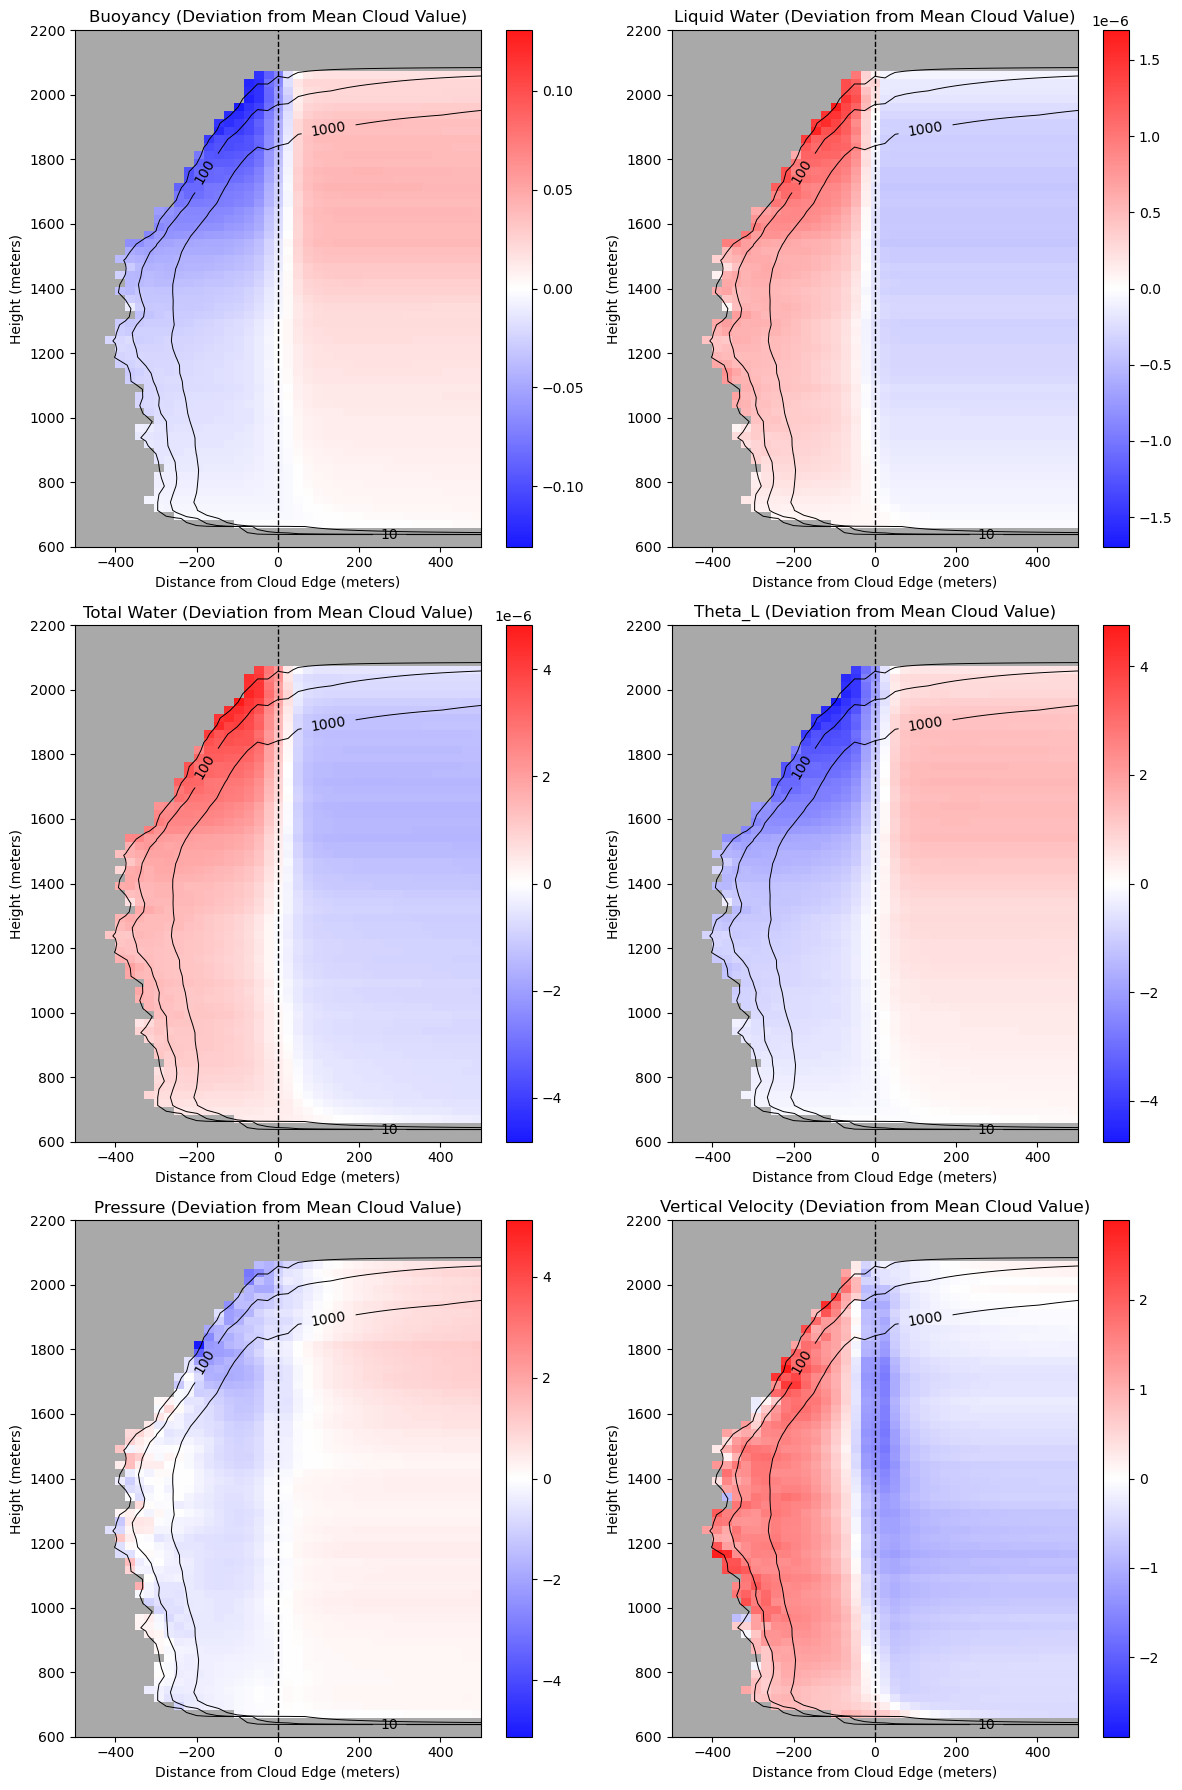

In [7]:
# Define custom contour levels for cloud count (you can modify these)
custom_contour_levels = np.array([10, 100, 1000])  # Example: focus on lower numbers

# Plotting multiple variables (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
variables = ['buoyancy', 'liquid_water', 'total_water', 'theta_l', 'pressure', 'w']
titles = ['Buoyancy', 'Liquid Water', 'Total Water', 'Theta_L', 'Pressure', 'Vertical Velocity']

for ax, var, title in zip(axs.flat, variables, titles):
    data = np.ma.masked_invalid(mean_results[var])
    
    # Calculate the mean cloud value for each height level
    mean_cloud_values = np.zeros(data.shape[0])
    for z in range(data.shape[0]):
        cloud_points = data[z, :]  # All points at this height level
        cloud_mask_at_z = ~np.isnan(cloud_points)  # Use non-NaN values as cloud points
        if np.any(cloud_mask_at_z):
            mean_cloud_values[z] = np.nanmean(cloud_points[cloud_mask_at_z])
        else:
            mean_cloud_values[z] = np.nan  # No cloud points at this height

    # Subtract the mean cloud value at each height level from all points at that height
    for z in range(data.shape[0]):
        data[z, :] -= mean_cloud_values[z]
    
    # Modify colormap for each plot
    cmap = plt.get_cmap('bwr')
    cmap = cmap(np.arange(cmap.N))
    cmap[:, -1] = 0.9  # Set alpha to 0.9 for all colors (transparency)
    cmap = ListedColormap(cmap)
    cmap.set_bad(color='darkgrey')

    # Adjust the color bar to emphasize 0 and use the actual data range
    data_min, data_max = np.nanmin(data), np.nanmax(data)
    data_abs_max = max(abs(data_min), abs(data_max))
    norm = Normalize(vmin=-data_abs_max, vmax=data_abs_max)
    
    # Plot the data
    im = ax.imshow(data, cmap=cmap, norm=norm, origin='lower', aspect='auto',
                   extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]])
    ax.set_title(f"{title} (Deviation from Mean Cloud Value)")
    ax.set_xlabel('Distance from Cloud Edge (meters)')
    ax.set_ylabel('Height (meters)')
    
    # Set the y-axis limit between 500 and 2200 meters
    ax.set_ylim(600, 2200)
    
    # Add a vertical line at x=0 to denote the cloud edge
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1, label='Cloud Edge')
    
    # Add color bar for each subplot
    fig.colorbar(im, ax=ax)

    # Overlay cloud count as contour
    cloud_count = mean_results['cloud_count']  # Access the cloud count data
    
    # Check if custom contour levels are provided
    if custom_contour_levels is not None:
        levels = custom_contour_levels  # Use the custom levels
    else:
        levels = np.linspace(np.min(cloud_count), np.max(cloud_count), 10)  # Default to 10 evenly spaced levels
    
    # Plot the contour with the chosen levels
    cs = ax.contour(distance_in_meters, zt_values, cloud_count, levels=levels, colors='black', linewidths=0.7)
    ax.clabel(cs, fmt='%d')  # Label contour lines with numbers

# Display the plot
plt.tight_layout()
#plt.savefig('difference_updated.pdf', format='pdf')
plt.show()


# Vertically averaged

1-sigma deviation represents the variability of values at each height level for each distance! Not how they vary across heights, but how they vary within a height level.

Processing timestep 10...
Processing timestep 11...
Processing timestep 12...
Processing timestep 13...
Processing timestep 14...
Processing timestep 15...
Processing timestep 16...
Processing timestep 17...
Processing timestep 18...
Processing timestep 19...
Processing timestep 20...
Processing timestep 21...
Processing timestep 22...
Processing timestep 23...
Processing timestep 24...
Processing timestep 25...
Processing timestep 26...
Processing timestep 27...
Processing timestep 28...
Processing timestep 29...


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_67484/2887947368.py:107: RuntimeWarning: Mean of empty slice
  mean_results[key] = np.nanmean([result[key] for result in all_results], axis=0)  # Average for other variables
/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_67484/2887947368.py:103: RuntimeWarning: Mean of empty slice
  mean_results['cloud_mean'][sub_key] = np.nanmean([result['cloud_mean'][sub_key] for result in all_results], axis=0)
/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_67484/2887947368.py:133: RuntimeWarning: Mean of empty slice
  vertical_mean = np.nanmean(mean_results[var], axis=0)


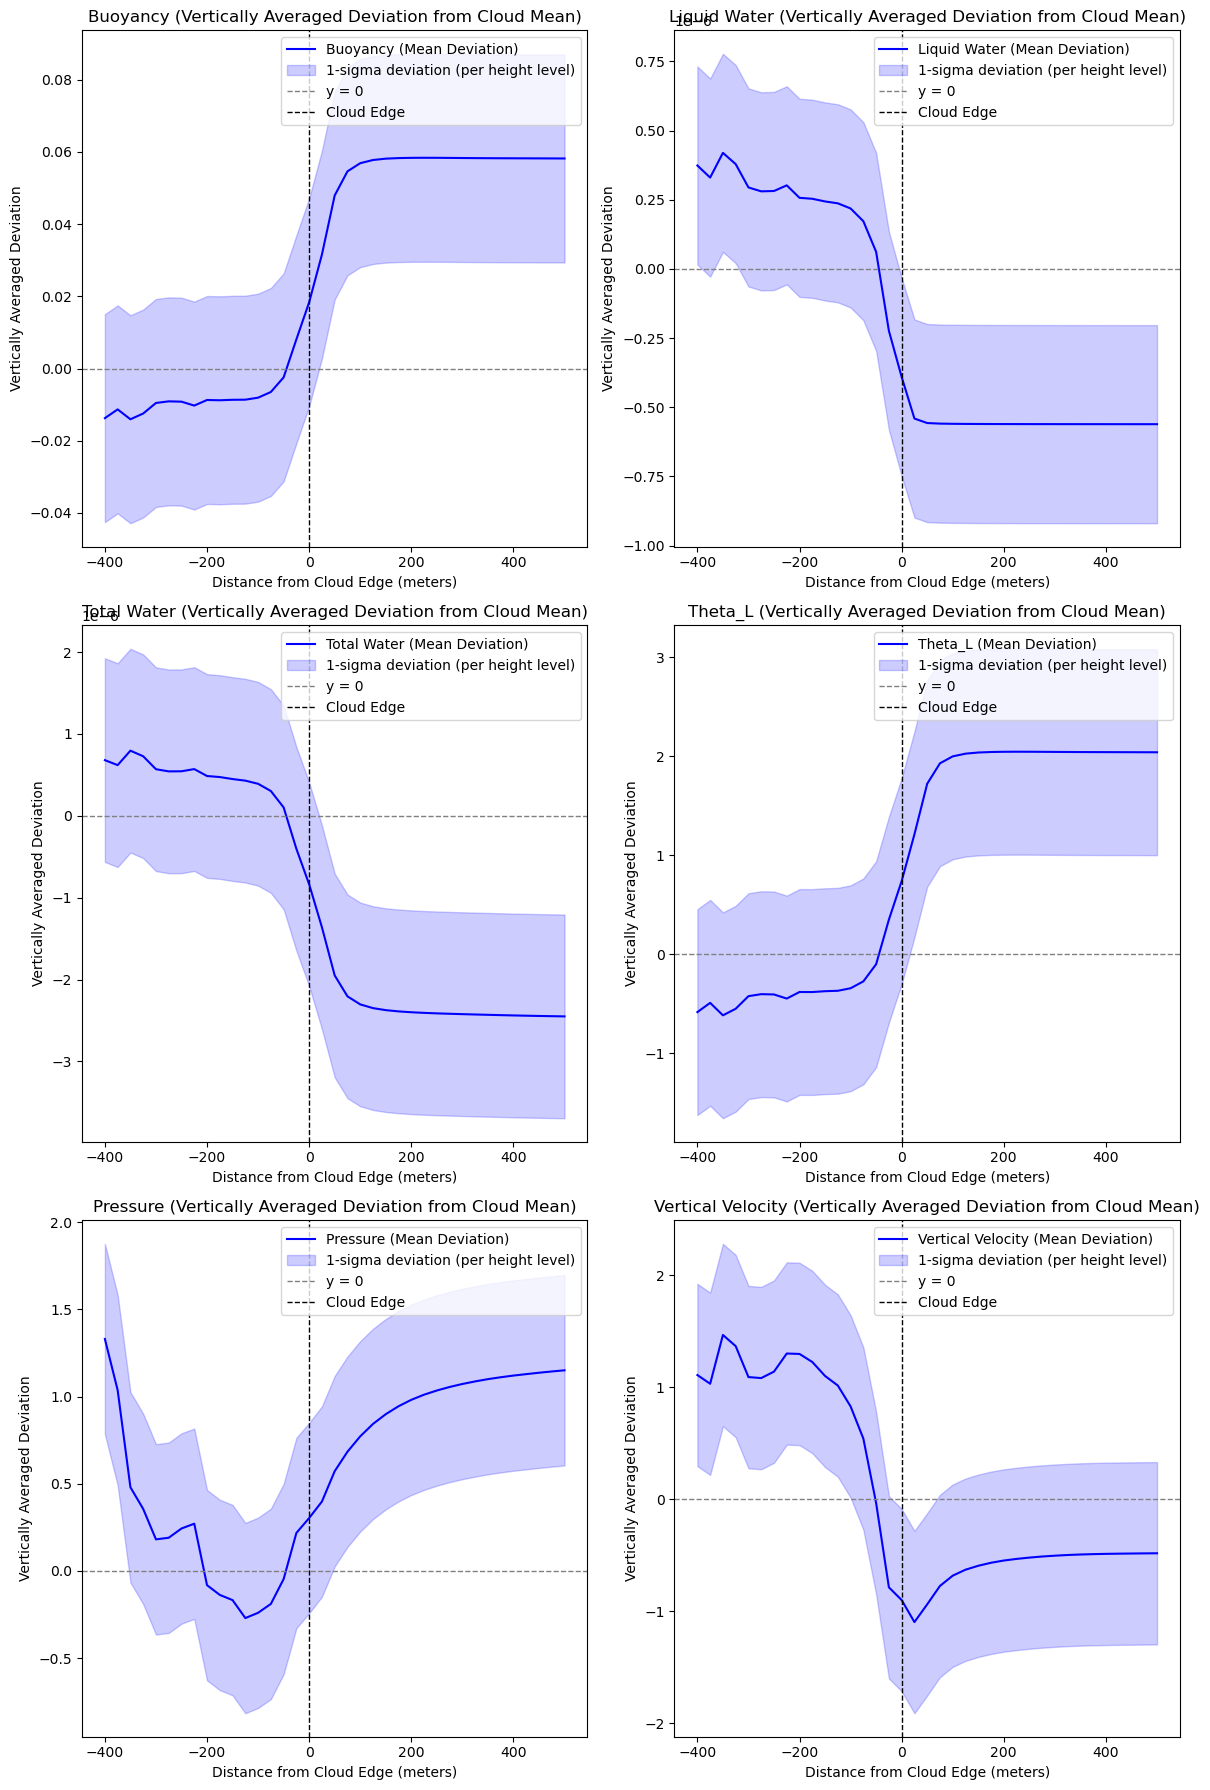

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the deviation from cloud mean
def calculate_values_vs_distance_and_deviation(buoyancy_data, liquid_water_data, total_water_data, theta_l_data, pressure_data, w_data, cloud_mask, max_distance):
    """Calculate values as a function of distance from cloud center and edge, including deviation from cloud mean."""
    height_levels = buoyancy_data.shape[0]
    total_distance = max_distance * 2 + 1  # max_distance inward + max_distance outward + 1 for center
    results = {
        'buoyancy': np.full((height_levels, total_distance), np.nan),
        'liquid_water': np.full((height_levels, total_distance), np.nan),
        'total_water': np.full((height_levels, total_distance), np.nan),
        'theta_l': np.full((height_levels, total_distance), np.nan),
        'pressure': np.full((height_levels, total_distance), np.nan),
        'w': np.full((height_levels, total_distance), np.nan),
        'cloud_mean': {'buoyancy': np.full(height_levels, np.nan),
                       'liquid_water': np.full(height_levels, np.nan),
                       'total_water': np.full(height_levels, np.nan),
                       'theta_l': np.full(height_levels, np.nan),
                       'pressure': np.full(height_levels, np.nan),
                       'w': np.full(height_levels, np.nan)},
        'cloud_count': np.zeros((height_levels, total_distance), dtype=int)  # Track the number of cloud points contributing
    }

    for z in range(height_levels):
        region_cloud_mask = cloud_mask[z]

        # Only proceed if there are clouds at this height level
        if np.any(region_cloud_mask):
            # Calculate the mean values within clouds (for the cloud mask)
            results['cloud_mean']['buoyancy'][z] = np.nanmean(buoyancy_data[z, region_cloud_mask])
            results['cloud_mean']['liquid_water'][z] = np.nanmean(liquid_water_data[z, region_cloud_mask])
            results['cloud_mean']['total_water'][z] = np.nanmean(total_water_data[z, region_cloud_mask])
            results['cloud_mean']['theta_l'][z] = np.nanmean(theta_l_data[z, region_cloud_mask])
            results['cloud_mean']['pressure'][z] = np.nanmean(pressure_data[z, region_cloud_mask])
            results['cloud_mean']['w'][z] = np.nanmean(w_data[z, region_cloud_mask])

            # Compute distances from cloud edges
            distance_outward = distance_transform_cdt(~region_cloud_mask, metric='taxicab')
            distance_inward = distance_transform_cdt(region_cloud_mask, metric='taxicab')

            # Combine distances: positive for outward, negative for inward, and 0 for the cloud edge
            distances = np.full(region_cloud_mask.shape, np.nan)  # Initialize with NaN
            distances[region_cloud_mask] = -distance_inward[region_cloud_mask]
            distances[~region_cloud_mask] = distance_outward[~region_cloud_mask]

            # Find the cloud edge and set distances to 0 at the edges
            cloud_edges = (region_cloud_mask[:, :-1] & ~region_cloud_mask[:, 1:]) | (~region_cloud_mask[:, :-1] & region_cloud_mask[:, 1:])
            edge_indices = np.where(cloud_edges)
            distances[edge_indices] = 0

            # Calculate deviation from cloud mean at each distance
            for distance in range(-max_distance, max_distance + 1):
                indices = np.where(distances == distance)
                if len(indices[0]) > 0:
                    # Calculate deviations for each variable
                    results['buoyancy'][z, distance + max_distance] = np.mean(buoyancy_data[z, indices[0], indices[1]]) - results['cloud_mean']['buoyancy'][z]
                    results['liquid_water'][z, distance + max_distance] = np.mean(liquid_water_data[z, indices[0], indices[1]]) - results['cloud_mean']['liquid_water'][z]
                    results['total_water'][z, distance + max_distance] = np.mean(total_water_data[z, indices[0], indices[1]]) - results['cloud_mean']['total_water'][z]
                    results['theta_l'][z, distance + max_distance] = np.mean(theta_l_data[z, indices[0], indices[1]]) - results['cloud_mean']['theta_l'][z]
                    results['pressure'][z, distance + max_distance] = np.mean(pressure_data[z, indices[0], indices[1]]) - results['cloud_mean']['pressure'][z]
                    results['w'][z, distance + max_distance] = np.mean(w_data[z, indices[0], indices[1]]) - results['cloud_mean']['w'][z]
                    
                    # Count the number of cloud points contributing
                    results['cloud_count'][z, distance + max_distance] = len(indices[0])

    return results

def process_multiple_timesteps_with_edge(timesteps, max_distance):
    all_results = []

    for timestep in timesteps:
        # Load the data
        print(f"Processing timestep {timestep}...")
        theta_l_data = load_data_all_levels(t_file, 't', timestep)
        p_data = load_data_all_levels(p_file, 'p', timestep)
        q_t_data = load_data_all_levels(q_file, 'q', timestep)
        q_l_data = load_data_all_levels(l_file, 'l', timestep)
        q_v_data = q_t_data - q_l_data
        w_data = load_data_all_levels(w_file, 'w', timestep)

        # Create a cloud mask based on the liquid water threshold
        cloud_mask = q_l_data > 10e-8

        # Calculate temperature and density
        T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
        density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

        # Calculate buoyancy
        buoyancy_data = calculate_buoyancy(density_data, cloud_mask, g)

        # Calculate deviation from cloud mean for each variable
        results = calculate_values_vs_distance_and_deviation(buoyancy_data, q_l_data, q_t_data, theta_l_data, p_data, w_data, cloud_mask, max_distance)
        all_results.append(results)

    # Initialize mean_results to accumulate data
    mean_results = all_results[0].copy()

    # Process cloud_mean dictionary separately
    for key in mean_results.keys():
        if key == 'cloud_mean':
            for sub_key in mean_results[key].keys():
                mean_results['cloud_mean'][sub_key] = np.nanmean([result['cloud_mean'][sub_key] for result in all_results], axis=0)
        elif key == 'cloud_count':
            mean_results[key] = np.nansum([result[key] for result in all_results], axis=0)  # Sum for cloud_count
        else:
            mean_results[key] = np.nanmean([result[key] for result in all_results], axis=0)  # Average for other variables

    return mean_results


# Parameters
timesteps = list(range(10, 12))
max_distance_in_meters = 500
max_distance = max_distance_in_meters // horizontal_resolution

# Run the calculation
mean_results = process_multiple_timesteps_with_edge(timesteps, max_distance)

# Calculate distances in meters
distance_in_meters = np.arange(-max_distance, max_distance + 1) * horizontal_resolution

# Load height levels
zt_values = load_zt_values(t_file)

# Plotting multiple variables (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
variables = ['buoyancy', 'liquid_water', 'total_water', 'theta_l', 'pressure', 'w']
titles = ['Buoyancy', 'Liquid Water', 'Total Water', 'Theta_L', 'Pressure', 'Vertical Velocity']

for ax, var, title in zip(axs.flat, variables, titles):
    # Vertically average the deviation from cloud mean for each distance
    vertical_mean = np.nanmean(mean_results[var], axis=0)
    
    # Calculate 1-sigma standard deviation within each height level (i.e., at each distance)
    per_height_sigma = np.nanstd(mean_results[var], axis=1)  # Standard deviation within each height level
    averaged_sigma = np.nanmean(per_height_sigma)  # Average across all height levels for shading
    
    # Plot the vertically averaged deviation
    ax.plot(distance_in_meters, vertical_mean, label=f'{title} (Mean Deviation)', color='b')
    
    # Shade the area between (mean - sigma) and (mean + sigma) to show variability
    ax.fill_between(distance_in_meters, vertical_mean - averaged_sigma, vertical_mean + averaged_sigma,
                    color='b', alpha=0.2, label='1-sigma deviation (per height level)')
    
    # Add a horizontal line at y=0
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=1, label='y = 0')
    
    # Set labels and title
    ax.set_title(f'{title} (Vertically Averaged Deviation from Cloud Mean)')
    ax.set_xlabel('Distance from Cloud Edge (meters)')
    ax.set_ylabel('Vertically Averaged Deviation')
    
    # Add a vertical line at x=0 to denote the cloud edge
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1, label='Cloud Edge')
    
    # Add legend
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
#plt.savefig('vertically_averaged_deviation_with_sigma.pdf', format='pdf')
plt.show()


# Investigation: cloud grouping
## (for the above plots)

Trying to group clouds by:
- size
- height
- shape?

In [42]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt, label
from matplotlib.colors import Normalize, ListedColormap

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
g = 9.81  # m/s^2 acceleration due to gravity
horizontal_resolution = 25  # Horizontal resolution in meters

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_p) * ((1 + q_v) / (1 + q_v))
    T = theta_l * (c_p / (c_p - L_v * q_l)) * (100000.0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + 1)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (461.51 * T)) + (q_l * 1000.0)
    return rho

def calculate_buoyancy(density, cloud_mask, g):
    """Calculate buoyancy using the corrected equation."""
    buoyancy = np.zeros_like(density)
    for z in range(density.shape[0]):
        env_density_mean = np.mean(density[z, ~cloud_mask[z, :, :]])
        if np.isnan(env_density_mean):
            continue
        buoyancy[z, :, :] = g * (env_density_mean - density[z, :, :]) / env_density_mean
    return buoyancy

Processing timestep 5...
Processing timestep 6...
Processing timestep 7...
Processing timestep 8...
Processing timestep 9...
Processing timestep 10...
Processing timestep 11...
Processing timestep 12...
Processing timestep 13...
Processing timestep 14...


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_6323/1097686649.py:122: RuntimeWarning: Mean of empty slice
  vertical_mean_large = np.nanmean(mean_results_large[0][var], axis=0)
/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_6323/1097686649.py:123: RuntimeWarning: Mean of empty slice
  vertical_mean_small = np.nanmean(mean_results_small[0][var], axis=0)


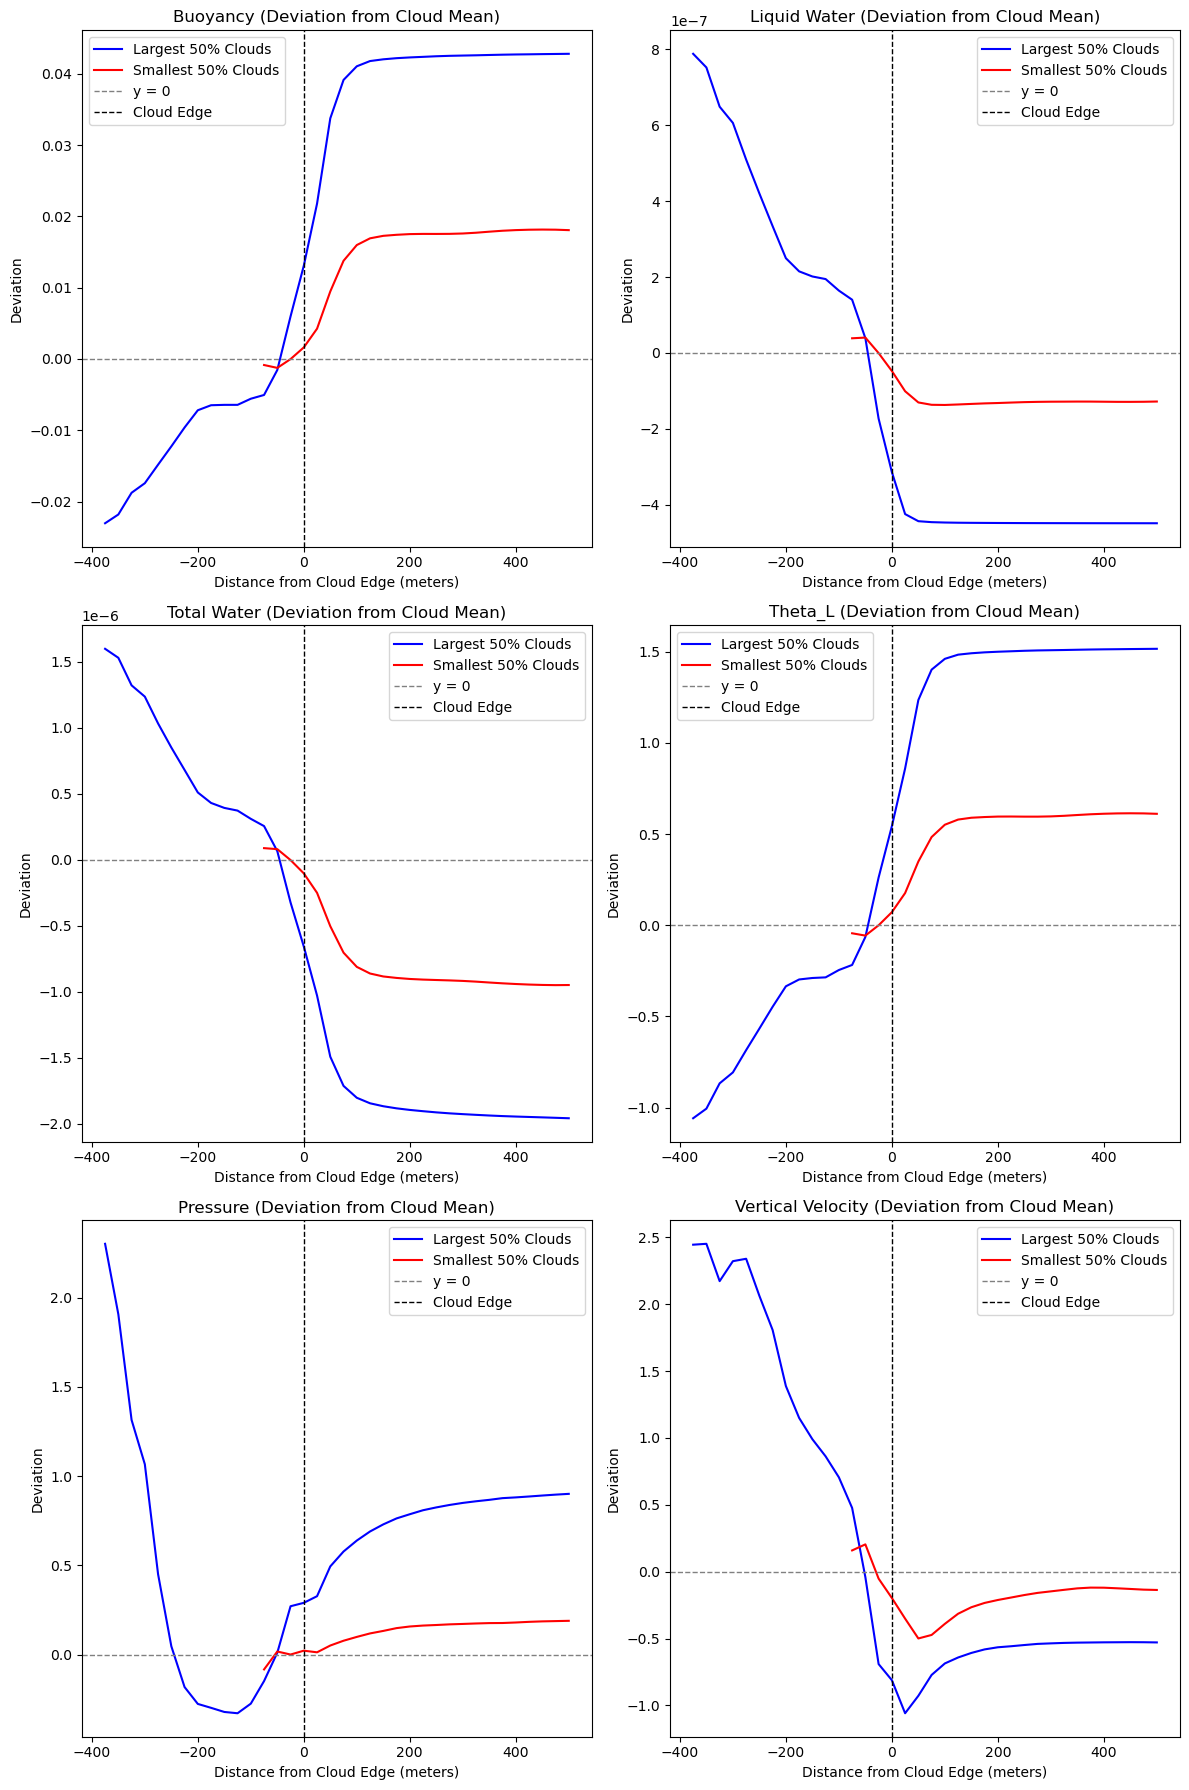

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

timesteps = list(range(5, 15))  # Define the range or list of timesteps to process

def calculate_values_for_cloud_size(buoyancy_data, liquid_water_data, total_water_data, theta_l_data, pressure_data, w_data, cloud_mask, max_distance, cloud_sizes_mask):
    """Helper function to calculate deviation for a specific cloud size category (largest or smallest clouds)."""
    height_levels = buoyancy_data.shape[0]
    total_distance = max_distance * 2 + 1
    results = {
        'buoyancy': np.full((height_levels, total_distance), np.nan),
        'liquid_water': np.full((height_levels, total_distance), np.nan),
        'total_water': np.full((height_levels, total_distance), np.nan),
        'theta_l': np.full((height_levels, total_distance), np.nan),
        'pressure': np.full((height_levels, total_distance), np.nan),
        'w': np.full((height_levels, total_distance), np.nan),
        'cloud_mean': {'buoyancy': np.full(height_levels, np.nan),
                       'liquid_water': np.full(height_levels, np.nan),
                       'total_water': np.full(height_levels, np.nan),
                       'theta_l': np.full(height_levels, np.nan),
                       'pressure': np.full(height_levels, np.nan),
                       'w': np.full(height_levels, np.nan)},
        'cloud_count': np.zeros((height_levels, total_distance), dtype=int)
    }

    for z in range(height_levels):
        region_cloud_mask = cloud_mask[z] & cloud_sizes_mask[z]  # Apply size filter

        if np.any(region_cloud_mask):
            results['cloud_mean']['buoyancy'][z] = np.nanmean(buoyancy_data[z, region_cloud_mask])
            results['cloud_mean']['liquid_water'][z] = np.nanmean(liquid_water_data[z, region_cloud_mask])
            results['cloud_mean']['total_water'][z] = np.nanmean(total_water_data[z, region_cloud_mask])
            results['cloud_mean']['theta_l'][z] = np.nanmean(theta_l_data[z, region_cloud_mask])
            results['cloud_mean']['pressure'][z] = np.nanmean(pressure_data[z, region_cloud_mask])
            results['cloud_mean']['w'][z] = np.nanmean(w_data[z, region_cloud_mask])

            distance_outward = distance_transform_cdt(~region_cloud_mask, metric='taxicab')
            distance_inward = distance_transform_cdt(region_cloud_mask, metric='taxicab')

            distances = np.full(region_cloud_mask.shape, np.nan)
            distances[region_cloud_mask] = -distance_inward[region_cloud_mask]
            distances[~region_cloud_mask] = distance_outward[~region_cloud_mask]

            cloud_edges = (region_cloud_mask[:, :-1] & ~region_cloud_mask[:, 1:]) | (~region_cloud_mask[:, :-1] & region_cloud_mask[:, 1:])
            edge_indices = np.where(cloud_edges)
            distances[edge_indices] = 0

            for distance in range(-max_distance, max_distance + 1):
                indices = np.where(distances == distance)
                if len(indices[0]) > 0:
                    results['buoyancy'][z, distance + max_distance] = np.mean(buoyancy_data[z, indices[0], indices[1]]) - results['cloud_mean']['buoyancy'][z]
                    results['liquid_water'][z, distance + max_distance] = np.mean(liquid_water_data[z, indices[0], indices[1]]) - results['cloud_mean']['liquid_water'][z]
                    results['total_water'][z, distance + max_distance] = np.mean(total_water_data[z, indices[0], indices[1]]) - results['cloud_mean']['total_water'][z]
                    results['theta_l'][z, distance + max_distance] = np.mean(theta_l_data[z, indices[0], indices[1]]) - results['cloud_mean']['theta_l'][z]
                    results['pressure'][z, distance + max_distance] = np.mean(pressure_data[z, indices[0], indices[1]]) - results['cloud_mean']['pressure'][z]
                    results['w'][z, distance + max_distance] = np.mean(w_data[z, indices[0], indices[1]]) - results['cloud_mean']['w'][z]

                    results['cloud_count'][z, distance + max_distance] = len(indices[0])

    return results


def identify_large_and_small_clouds(cloud_mask, percentile=50):
    """Identify the largest and smallest clouds based on cloud sizes."""
    labeled_clouds, num_features = label(cloud_mask)
    cloud_sizes = np.bincount(labeled_clouds.ravel())[1:]  # Ignore background (label 0)
    
    # Determine size thresholds for the largest and smallest clouds
    size_threshold_large = np.percentile(cloud_sizes, 100 - percentile)
    size_threshold_small = np.percentile(cloud_sizes, percentile)

    large_clouds_mask = np.isin(labeled_clouds, np.where(cloud_sizes >= size_threshold_large)[0] + 1)
    small_clouds_mask = np.isin(labeled_clouds, np.where(cloud_sizes <= size_threshold_small)[0] + 1)

    return large_clouds_mask, small_clouds_mask


def process_multiple_timesteps_with_edge_for_cloud_size(timesteps, max_distance):
    all_results_large = []
    all_results_small = []

    for timestep in timesteps:
        print(f"Processing timestep {timestep}...")
        theta_l_data = load_data_all_levels(t_file, 't', timestep)
        p_data = load_data_all_levels(p_file, 'p', timestep)
        q_t_data = load_data_all_levels(q_file, 'q', timestep)
        q_l_data = load_data_all_levels(l_file, 'l', timestep)
        q_v_data = q_t_data - q_l_data
        w_data = load_data_all_levels(w_file, 'w', timestep)

        cloud_mask = q_l_data > 10e-8

        T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
        density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

        buoyancy_data = calculate_buoyancy(density_data, cloud_mask, g)

        # Identify large and small clouds
        large_clouds_mask, small_clouds_mask = identify_large_and_small_clouds(cloud_mask)

        # Calculate for large clouds
        results_large = calculate_values_for_cloud_size(buoyancy_data, q_l_data, q_t_data, theta_l_data, p_data, w_data, cloud_mask, max_distance, large_clouds_mask)
        all_results_large.append(results_large)

        # Calculate for small clouds
        results_small = calculate_values_for_cloud_size(buoyancy_data, q_l_data, q_t_data, theta_l_data, p_data, w_data, cloud_mask, max_distance, small_clouds_mask)
        all_results_small.append(results_small)

    return all_results_large, all_results_small


# Process the timesteps and calculate for large and small clouds
mean_results_large, mean_results_small = process_multiple_timesteps_with_edge_for_cloud_size(timesteps, max_distance)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
variables = ['buoyancy', 'liquid_water', 'total_water', 'theta_l', 'pressure', 'w']
titles = ['Buoyancy', 'Liquid Water', 'Total Water', 'Theta_L', 'Pressure', 'Vertical Velocity']

for ax, var, title in zip(axs.flat, variables, titles):
    vertical_mean_large = np.nanmean(mean_results_large[0][var], axis=0)
    vertical_mean_small = np.nanmean(mean_results_small[0][var], axis=0)

    ax.plot(distance_in_meters, vertical_mean_large, label=f'Largest 50% Clouds', color='b')
    ax.plot(distance_in_meters, vertical_mean_small, label=f'Smallest 50% Clouds', color='r')
    
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=1, label='y = 0')
    ax.set_title(f'{title} (Deviation from Cloud Mean)')
    ax.set_xlabel('Distance from Cloud Edge (meters)')
    ax.set_ylabel('Deviation')
    
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1, label='Cloud Edge')
    ax.legend()

plt.tight_layout()
plt.savefig('size_percentiles_difference.pdf', format='pdf')
plt.show()


Processing timestep 5...
Processing timestep 6...
Processing timestep 7...
Processing timestep 8...
Processing timestep 9...
Processing timestep 10...
Processing timestep 11...
Processing timestep 12...
Processing timestep 13...
Processing timestep 14...


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_6323/3506753246.py:142: RuntimeWarning: Mean of empty slice
  vertical_mean_short = np.nanmean([result[var] for result in mean_results_short], axis=(0, 1))


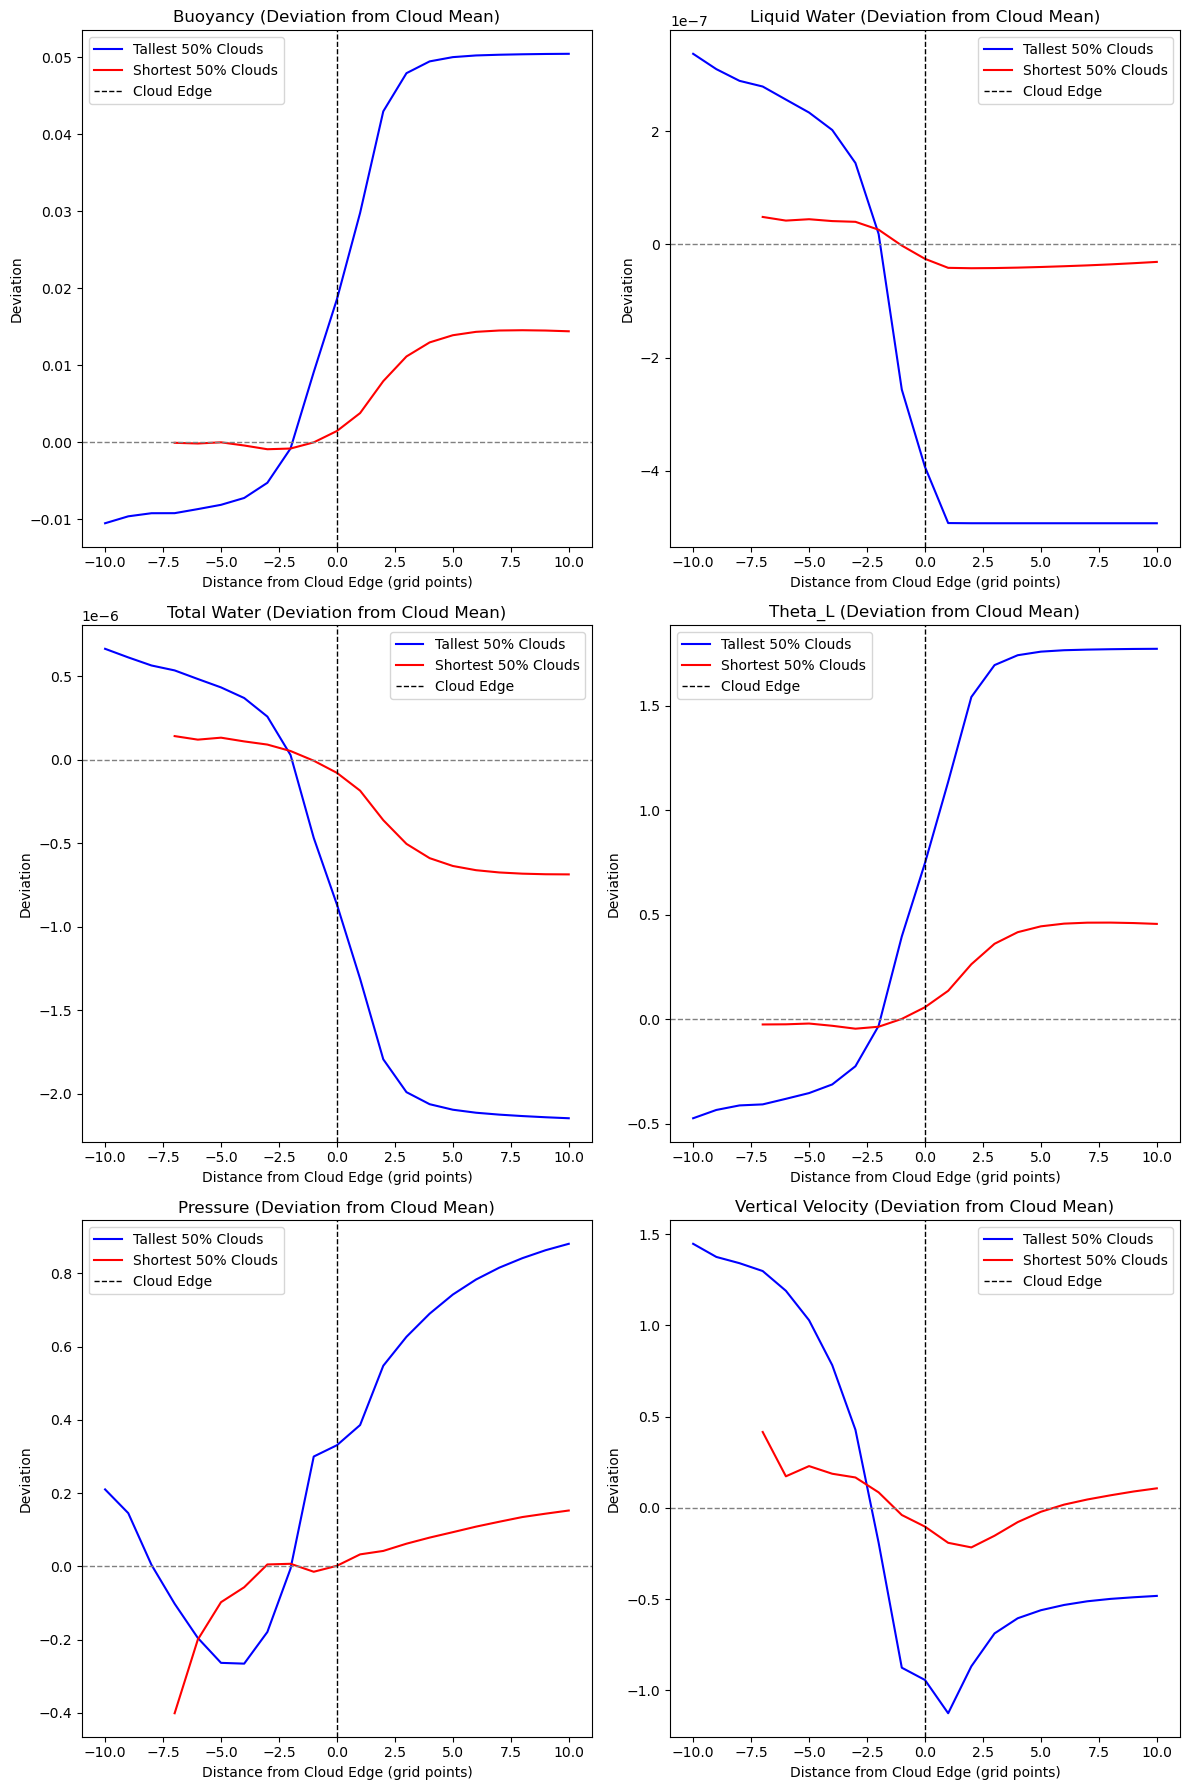

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from scipy.ndimage import distance_transform_cdt

timesteps = list(range(5, 15))  # Define the range or list of timesteps to process
max_distance = 10  # Define the maximum distance for edge calculations

# Assume load_data_all_levels, calculate_temperature, calculate_density, calculate_buoyancy, and other helper functions are defined elsewhere.

def calculate_values_for_cloud_height(buoyancy_data, liquid_water_data, total_water_data, theta_l_data, pressure_data, w_data, cloud_mask, max_distance, cloud_height_mask):
    """Helper function to calculate deviation for a specific cloud height category (tallest or shortest clouds)."""
    height_levels = buoyancy_data.shape[0]
    total_distance = max_distance * 2 + 1
    results = {
        'buoyancy': np.full((height_levels, total_distance), np.nan),
        'liquid_water': np.full((height_levels, total_distance), np.nan),
        'total_water': np.full((height_levels, total_distance), np.nan),
        'theta_l': np.full((height_levels, total_distance), np.nan),
        'pressure': np.full((height_levels, total_distance), np.nan),
        'w': np.full((height_levels, total_distance), np.nan),
        'cloud_mean': {'buoyancy': np.full(height_levels, np.nan),
                       'liquid_water': np.full(height_levels, np.nan),
                       'total_water': np.full(height_levels, np.nan),
                       'theta_l': np.full(height_levels, np.nan),
                       'pressure': np.full(height_levels, np.nan),
                       'w': np.full(height_levels, np.nan)},
        'cloud_count': np.zeros((height_levels, total_distance), dtype=int)
    }

    for z in range(height_levels):
        region_cloud_mask = cloud_mask[z] & cloud_height_mask[z]  # Apply height filter

        if np.any(region_cloud_mask):
            results['cloud_mean']['buoyancy'][z] = np.nanmean(buoyancy_data[z, region_cloud_mask])
            results['cloud_mean']['liquid_water'][z] = np.nanmean(liquid_water_data[z, region_cloud_mask])
            results['cloud_mean']['total_water'][z] = np.nanmean(total_water_data[z, region_cloud_mask])
            results['cloud_mean']['theta_l'][z] = np.nanmean(theta_l_data[z, region_cloud_mask])
            results['cloud_mean']['pressure'][z] = np.nanmean(pressure_data[z, region_cloud_mask])
            results['cloud_mean']['w'][z] = np.nanmean(w_data[z, region_cloud_mask])

            distance_outward = distance_transform_cdt(~region_cloud_mask, metric='taxicab')
            distance_inward = distance_transform_cdt(region_cloud_mask, metric='taxicab')

            distances = np.full(region_cloud_mask.shape, np.nan)
            distances[region_cloud_mask] = -distance_inward[region_cloud_mask]
            distances[~region_cloud_mask] = distance_outward[~region_cloud_mask]

            cloud_edges = (region_cloud_mask[:, :-1] & ~region_cloud_mask[:, 1:]) | (~region_cloud_mask[:, :-1] & region_cloud_mask[:, 1:])
            edge_indices = np.where(cloud_edges)
            distances[edge_indices] = 0

            for distance in range(-max_distance, max_distance + 1):
                indices = np.where(distances == distance)
                if len(indices[0]) > 0:
                    results['buoyancy'][z, distance + max_distance] = np.mean(buoyancy_data[z, indices[0], indices[1]]) - results['cloud_mean']['buoyancy'][z]
                    results['liquid_water'][z, distance + max_distance] = np.mean(liquid_water_data[z, indices[0], indices[1]]) - results['cloud_mean']['liquid_water'][z]
                    results['total_water'][z, distance + max_distance] = np.mean(total_water_data[z, indices[0], indices[1]]) - results['cloud_mean']['total_water'][z]
                    results['theta_l'][z, distance + max_distance] = np.mean(theta_l_data[z, indices[0], indices[1]]) - results['cloud_mean']['theta_l'][z]
                    results['pressure'][z, distance + max_distance] = np.mean(pressure_data[z, indices[0], indices[1]]) - results['cloud_mean']['pressure'][z]
                    results['w'][z, distance + max_distance] = np.mean(w_data[z, indices[0], indices[1]]) - results['cloud_mean']['w'][z]

                    results['cloud_count'][z, distance + max_distance] = len(indices[0])

    return results


def identify_tall_and_short_clouds(cloud_mask, percentile=50):
    """Identify the tallest and shortest clouds based on their vertical extents."""
    # Label clouds in 3D (height x spatial dimensions)
    labeled_clouds, num_features = label(cloud_mask)
    
    # Compute the vertical extent for each cloud
    cloud_heights = np.zeros(num_features)
    for label_id in range(1, num_features + 1):
        indices = np.where(labeled_clouds == label_id)
        z_indices = indices[0]  # z is the first dimension
        vertical_extent = z_indices.max() - z_indices.min() + 1
        cloud_heights[label_id - 1] = vertical_extent
    
    # Determine height thresholds for the tallest and shortest clouds
    height_threshold_tall = np.percentile(cloud_heights, 100 - percentile)
    height_threshold_short = np.percentile(cloud_heights, percentile)

    # Select the labels of the tallest and shortest clouds
    tall_cloud_labels = np.where(cloud_heights >= height_threshold_tall)[0] + 1  # +1 because labels start from 1
    short_cloud_labels = np.where(cloud_heights <= height_threshold_short)[0] + 1

    # Create masks for the tall and short clouds
    tall_clouds_mask = np.isin(labeled_clouds, tall_cloud_labels)
    short_clouds_mask = np.isin(labeled_clouds, short_cloud_labels)

    return tall_clouds_mask, short_clouds_mask


def process_multiple_timesteps_with_edge_for_cloud_height(timesteps, max_distance):
    all_results_tall = []
    all_results_short = []

    for timestep in timesteps:
        print(f"Processing timestep {timestep}...")
        theta_l_data = load_data_all_levels(t_file, 't', timestep)
        p_data = load_data_all_levels(p_file, 'p', timestep)
        q_t_data = load_data_all_levels(q_file, 'q', timestep)
        q_l_data = load_data_all_levels(l_file, 'l', timestep)
        q_v_data = q_t_data - q_l_data
        w_data = load_data_all_levels(w_file, 'w', timestep)

        cloud_mask = q_l_data > 1e-8  # Adjusted threshold

        T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
        density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

        buoyancy_data = calculate_buoyancy(density_data, cloud_mask, g)

        # Identify tall and short clouds
        tall_clouds_mask, short_clouds_mask = identify_tall_and_short_clouds(cloud_mask)

        # Calculate for tall clouds
        results_tall = calculate_values_for_cloud_height(buoyancy_data, q_l_data, q_t_data, theta_l_data, p_data, w_data, cloud_mask, max_distance, tall_clouds_mask)
        all_results_tall.append(results_tall)

        # Calculate for short clouds
        results_short = calculate_values_for_cloud_height(buoyancy_data, q_l_data, q_t_data, theta_l_data, p_data, w_data, cloud_mask, max_distance, short_clouds_mask)
        all_results_short.append(results_short)

    return all_results_tall, all_results_short


# Process the timesteps and calculate for tall and short clouds
mean_results_tall, mean_results_short = process_multiple_timesteps_with_edge_for_cloud_height(timesteps, max_distance)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
variables = ['buoyancy', 'liquid_water', 'total_water', 'theta_l', 'pressure', 'w']
titles = ['Buoyancy', 'Liquid Water', 'Total Water', 'Theta_L', 'Pressure', 'Vertical Velocity']
distance_in_meters = np.arange(-max_distance, max_distance + 1)  # Adjust as needed

for ax, var, title in zip(axs.flat, variables, titles):
    # Compute mean across all timesteps and height levels
    vertical_mean_tall = np.nanmean([result[var] for result in mean_results_tall], axis=(0, 1))
    vertical_mean_short = np.nanmean([result[var] for result in mean_results_short], axis=(0, 1))

    ax.plot(distance_in_meters, vertical_mean_tall, label='Tallest 50% Clouds', color='b')
    ax.plot(distance_in_meters, vertical_mean_short, label='Shortest 50% Clouds', color='r')
    
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=1)
    ax.set_title(f'{title} (Deviation from Cloud Mean)')
    ax.set_xlabel('Distance from Cloud Edge (grid points)')
    ax.set_ylabel('Deviation')
    
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1, label='Cloud Edge')
    ax.legend()

plt.tight_layout()
plt.savefig('height_percentiles_difference.pdf', format='pdf')
plt.show()


# Old below

# Buoyancy difference: (near environment - mean environment)

In [ ]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt, binary_erosion
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches
from matplotlib.colors import Normalize

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_temperature(theta_l, p, q_t, q_l, q_v):
    """Calculate temperature from theta_l, pressure, total water, and water vapor mixing ratios."""
    kappa = (R_d / c_pd) * ((1 + q_v / epsilon) / (1 + q_v * (c_pv / c_pd)))
    T = theta_l * (c_pd / (c_pd - L_v * q_l)) * (p_0 / p) ** (-kappa)
    return T

def calculate_density(T, p, q_l, q_v):
    """Calculate air density from temperature, pressure, and liquid water mixing ratio."""
    p_v = (q_v / (q_v + epsilon)) * p
    rho = (p - p_v) / (R_d * T) + (p_v / (R_v * T)) + (q_l * rho_water)
    return rho

def calculate_buoyancy(density, cloud_mask, g):
    """Calculate buoyancy using the corrected equation."""
    buoyancy = np.zeros_like(density)
    for z in range(density.shape[0]):
        # Calculate the mean density of the environment (outside clouds)
        env_density_mean = np.mean(density[z, ~cloud_mask[z, :, :]])
        
        # Ensure that the environment density is valid
        if np.isnan(env_density_mean):
            continue
        
        # Calculate buoyancy for each point in the field
        buoyancy[z, :, :] = g * (env_density_mean - density[z, :, :]) / env_density_mean
    
    return buoyancy

def calculate_mean_buoyancy_diff(density_data, buoyancy_data, cloud_mask, grid_spacing, max_distance):
    """Calculate mean buoyancy difference vs distance from cloud edge."""
    height_levels = buoyancy_data.shape[0]
    buoyancy_diff = np.zeros((height_levels, max_distance + 1))  # Including distance 0

    mean_buoyancy_levels = np.zeros(height_levels)
    for z in range(height_levels):
        # mean *environmental* buoyancy
        #mean_buoyancy_levels[z] = np.mean(buoyancy_data[z, ~cloud_mask[z, :, :]])
        # mean domain buoyancy
        mean_buoyancy_levels[z] = np.mean(buoyancy_data[z, :, :])


    for z in range(height_levels):
        region_cloud_mask = cloud_mask[z]

        # Identify cloud edge points
        eroded_cloud_mask = binary_erosion(region_cloud_mask)
        cloud_edge_mask = region_cloud_mask & ~eroded_cloud_mask

        # Calculate buoyancy difference at the cloud edge (distance 0)
        if np.any(cloud_edge_mask):
            buoyancy_diff[z, 0] = np.mean(buoyancy_data[z, cloud_edge_mask] - mean_buoyancy_levels[z])

        # Initialize an array to mark already occupied points (to prevent overlap)
        occupied_mask = np.zeros_like(region_cloud_mask, dtype=bool)

        # Compute Manhattan distance from cloud edge
        distance_from_edge = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

        # Calculate buoyancy differences for neighboring points
        for distance in range(1, max_distance + 1):
            neighbors_y, neighbors_x = np.where(
                (distance_from_edge == distance) & (~region_cloud_mask) & (~occupied_mask)
            )

            # Mark these points as occupied to prevent overlap with other cloud areas
            occupied_mask[neighbors_y, neighbors_x] = True

            if len(neighbors_y) > 0:
                differences = buoyancy_data[z, neighbors_y, neighbors_x] - mean_buoyancy_levels[z]
                buoyancy_diff[z, distance] = np.mean(differences)

    return buoyancy_diff

# Function to process multiple timesteps and average results
def process_multiple_timesteps(timesteps):
    all_buoyancy_diffs = []

    for timestep in timesteps:
        # Load the data
        print (timestep)
        theta_l_data = load_data_all_levels(t_file, 't', timestep-1)
        p_data = load_data_all_levels(p_file, 'p', timestep)
        q_t_data = load_data_all_levels(q_file, 'q', timestep)
        q_l_data = load_data_all_levels(l_file, 'l', timestep)
        q_v_data = q_t_data - q_l_data

        # Calculate temperature and density
        T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)
        density_data = calculate_density(T_data, p_data, q_l_data, q_v_data)

        # Calculate buoyancy
        buoyancy_data = calculate_buoyancy(density_data, cloud_mask, g)

        # Calculate mean buoyancy difference for this timestep
        buoyancy_diff = calculate_mean_buoyancy_diff(density_data, buoyancy_data, cloud_mask, grid_spacing, max_distance)
        all_buoyancy_diffs.append(buoyancy_diff)

    # Average over all timesteps
    mean_buoyancy_diff = np.mean(all_buoyancy_diffs, axis=0)
    return mean_buoyancy_diff

# Parameters
timesteps = [11, 20, 30, 40, 50, 51]  # Example timesteps
max_distance = 10  # Maximum distance from the cloud edge in grid points
grid_spacing = 25  # Replace with your actual grid spacing value

# Load height levels in meters
zt_values = load_zt_values(t_file)

# Calculate mean buoyancy difference over multiple timesteps
mean_buoyancy_diff = process_multiple_timesteps(timesteps)

# Convert distances to meters
distance_in_meters = np.arange(0, max_distance + 1) * grid_spacing

# Plot the results
plt.figure(figsize=(12, 8))
plt.title('Mean Buoyancy Difference vs Distance from Cloud Edge')
plt.xlabel('Distance from Cloud Edge (meters)')
plt.ylabel('Height (meters)')

# Adjust the color bar to emphasize 0 buoyancy and highlight negatives
cmap = plt.get_cmap('bwr')  # Blue-White-Red colormap to highlight negative values
norm = Normalize(vmin=-np.max(np.abs(mean_buoyancy_diff)), vmax=np.max(np.abs(mean_buoyancy_diff)))

plt.imshow(mean_buoyancy_diff, cmap=cmap, norm=norm, origin='lower', aspect='auto',
           extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]])
plt.colorbar(label='Mean Buoyancy Difference (m/s^2)', extend='both')
plt.ylim([500, 2000])

plt.show()


## Larger font

In [ ]:

# # Plot the results
# plt.figure(figsize=(12, 8))

# # Set title and axis labels with increased font size
# plt.xlabel('Distance from Cloud Edge [m]', fontsize=16)
# plt.ylabel('Height [m]', fontsize=16)

# # Adjust the color bar to emphasize 0 buoyancy and highlight negatives
# cmap = plt.get_cmap('bwr')  # Blue-White-Red colormap to highlight negative values
# norm = Normalize(vmin=-np.max(np.abs(mean_buoyancy_diff)), vmax=np.max(np.abs(mean_buoyancy_diff)))

# plt.imshow(mean_buoyancy_diff, cmap=cmap, norm=norm, origin='lower', aspect='auto',
#            extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]])

# # Add colorbar with increased font size for label and tick labels
# cbar = plt.colorbar(label='Mean Buoyancy Difference (m/s^2)', extend='both')
# cbar.set_label('Mean Buoyancy Difference (m/s^2)', fontsize=16)  # Increase font size of colorbar label
# cbar.ax.tick_params(labelsize=14)  # Increase font size of colorbar tick labels

# # Adjust tick parameters for x and y axis
# plt.tick_params(axis='both', which='major', labelsize=14)

# # Set y-axis limits
# plt.ylim([500, 2000])

# # Display the plot
# plt.show()


# Buoyancy difference: (near environment - mean cloud buoyancy)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt, binary_erosion
from matplotlib.colors import TwoSlopeNorm

# Load height levels in meters
zt_values = load_zt_values(t_file)
dz = zt_values[1] - zt_values[0]  # Vertical grid spacing (assumed constant)

# Horizontal grid spacing in meters
grid_spacing = 25  # Replace with your actual grid spacing value

# Calculate the mean buoyancy at each level for cloudy points
mean_cloudy_buoyancy_levels = np.zeros(density_data.shape[0])
for z in range(density_data.shape[0]):
    mean_cloudy_buoyancy_levels[z] = np.mean(buoyancy_data[z, cloud_mask[z, :, :]])

# Initialize the array to store buoyancy differences
max_distance = 20
height_levels = buoyancy_data.shape[0]
buoyancy_diff = np.zeros((height_levels, max_distance))

# Process each height level
for z in range(height_levels):
    region_cloud_mask = cloud_mask[z]

    # Identify cloud edge points
    eroded_cloud_mask = binary_erosion(region_cloud_mask)
    cloud_edge_mask = region_cloud_mask & ~eroded_cloud_mask

    # Initialize an array to mark already occupied points (to prevent overlap)
    occupied_mask = np.zeros_like(region_cloud_mask, dtype=bool)

    # Compute Manhattan distance from cloud edge
    distance_from_edge = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

    # Calculate buoyancy differences for neighboring points
    for distance in range(1, max_distance + 1):
        neighbors_y, neighbors_x = np.where(
            (distance_from_edge == distance) & (~region_cloud_mask) & (~occupied_mask)
        )

        # Mark these points as occupied to prevent overlap with other cloud areas
        occupied_mask[neighbors_y, neighbors_x] = True

        if len(neighbors_y) > 0:
            differences = buoyancy_data[z, neighbors_y, neighbors_x] - mean_cloudy_buoyancy_levels[z]
            buoyancy_diff[z, distance - 1] = np.mean(differences)

# Convert distances to meters
distance_in_meters = np.arange(1, max_distance + 1) * grid_spacing

# Plot the results in meters
plt.figure(figsize=(12, 8))
plt.title('Mean Buoyancy Difference vs Distance from Cloud Edge (Compared to Cloudy Points)')
plt.xlabel('Distance from Cloud Edge (meters)')
plt.ylabel('Height (meters)')

# Use TwoSlopeNorm to center the colormap at zero (white color at zero)
norm = TwoSlopeNorm(vmin=buoyancy_diff.min(), vcenter=0, vmax=buoyancy_diff.max())
cmap = plt.get_cmap('bwr')  # Blue-White-Red colormap to highlight negative values

plt.imshow(buoyancy_diff, cmap=cmap, norm=norm, origin='lower', aspect='auto',
           extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]])
plt.colorbar(label='Mean Buoyancy Difference (m/s^2)', extend='both')
plt.ylim([500, 2000])

plt.show()


In [24]:
# Function to calculate the mean for each distance (average vertically)
def calculate_vertical_mean(data):
    return np.nanmean(data, axis=0)

# Calculate the vertical means for each variable difference
mean_buoyancy_diff_line = calculate_vertical_mean(mean_buoyancy_diff_vs_distance)
mean_liquid_water_diff_line = calculate_vertical_mean(mean_liquid_water_diff_vs_distance)
mean_total_water_diff_line = calculate_vertical_mean(mean_total_water_diff_vs_distance)
mean_theta_l_diff_line = calculate_vertical_mean(mean_theta_l_diff_vs_distance)
mean_pressure_diff_line = calculate_vertical_mean(mean_pressure_diff_vs_distance)
mean_vertical_velocity_diff_line = calculate_vertical_mean(mean_vertical_velocity_diff_vs_distance)

# Plotting the results as line plots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

# Variables, Titles
variables_line = [mean_buoyancy_diff_line, mean_liquid_water_diff_line, mean_total_water_diff_line,
                  mean_theta_l_diff_line, mean_pressure_diff_line, mean_vertical_velocity_diff_line]
titles_line = ['Mean Buoyancy Difference', 'Mean Liquid Water Difference', 'Mean Total Water Difference',
               'Mean Theta_L Difference', 'Mean Pressure Difference', 'Mean Vertical Velocity Difference']
ylabels_line = ['Mean Difference (m/s^2)', 'Mean Difference (kg/kg)', 'Mean Difference (kg/kg)',
                'Mean Difference (K)', 'Mean Difference (Pa)', 'Mean Difference (m/s)']

# Plot each variable line
for ax, var, title, ylabel in zip(axes, variables_line, titles_line, ylabels_line):
    ax.plot(distance_in_meters, var, color='blue', linewidth=2)
    ax.set_title(title)
    ax.set_xlabel('Distance from Cloud Edge (meters)')
    ax.set_ylabel(ylabel)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Mark the cloud edge
    ax.grid(True)

# Adjust layout
plt.tight_layout()

plt.show()


NameError: name 'mean_buoyancy_diff_vs_distance' is not defined

In [ ]:
# Function to calculate the mean and standard deviation for each distance (average vertically)
def calculate_vertical_mean_and_std(data):
    mean = np.nanmean(data, axis=0)
    std = np.nanstd(data, axis=0)
    return mean, std

# Calculate the vertical means and standard deviations for each variable difference
mean_buoyancy_diff_line, std_buoyancy_diff_line = calculate_vertical_mean_and_std(mean_buoyancy_diff_vs_distance)
mean_liquid_water_diff_line, std_liquid_water_diff_line = calculate_vertical_mean_and_std(mean_liquid_water_diff_vs_distance)
mean_total_water_diff_line, std_total_water_diff_line = calculate_vertical_mean_and_std(mean_total_water_diff_vs_distance)
mean_theta_l_diff_line, std_theta_l_diff_line = calculate_vertical_mean_and_std(mean_theta_l_diff_vs_distance)
mean_pressure_diff_line, std_pressure_diff_line = calculate_vertical_mean_and_std(mean_pressure_diff_vs_distance)
mean_vertical_velocity_diff_line, std_vertical_velocity_diff_line = calculate_vertical_mean_and_std(mean_vertical_velocity_diff_vs_distance)

# Plotting the results as line plots with one sigma variance bands
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

# Variables, Titles, and Y-labels
variables_line = [mean_buoyancy_diff_line, mean_liquid_water_diff_line, mean_total_water_diff_line,
                  mean_theta_l_diff_line, mean_pressure_diff_line, mean_vertical_velocity_diff_line]
stds_line = [std_buoyancy_diff_line, std_liquid_water_diff_line, std_total_water_diff_line,
             std_theta_l_diff_line, std_pressure_diff_line, std_vertical_velocity_diff_line]
titles_line = ['Mean Buoyancy Difference', 'Mean Liquid Water Difference', 'Mean Total Water Difference',
               'Mean Theta_L Difference', 'Mean Pressure Difference', 'Mean Vertical Velocity Difference']
ylabels_line = ['Mean Difference (m/s^2)', 'Mean Difference (kg/kg)', 'Mean Difference (kg/kg)',
                'Mean Difference (K)', 'Mean Difference (Pa)', 'Mean Difference (m/s)']

# Plot each variable line with one sigma variance bands
for ax, var, std, title, ylabel in zip(axes, variables_line, stds_line, titles_line, ylabels_line):
    ax.plot(distance_in_meters, var, color='blue', linewidth=2, label='Mean')
    ax.fill_between(distance_in_meters, var - std, var + std, color='blue', alpha=0.3, label='1 Sigma')
    ax.set_title(title)
    ax.set_xlabel('Distance from Cloud Edge (meters)')
    ax.set_ylabel(ylabel)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1, label='Cloud Edge')  # Mark the cloud edge
    ax.grid(True)
    ax.legend()

# Adjust layout
plt.tight_layout()

plt.show()


# Temperature
## (near environment - mean environment)

In [ ]:
def calculate_mean_temperature_diff(T_data, cloud_mask, grid_spacing, max_distance):
    """Calculate mean temperature difference vs distance from cloud edge."""
    height_levels = T_data.shape[0]
    temperature_diff = np.zeros((height_levels, max_distance + 1))  # Including distance 0

    mean_temperature_levels = np.zeros(height_levels)
    for z in range(height_levels):
        mean_temperature_levels[z] = np.mean(T_data[z, ~cloud_mask[z, :, :]])

    for z in range(height_levels):
        region_cloud_mask = cloud_mask[z]

        # Identify cloud edge points
        eroded_cloud_mask = binary_erosion(region_cloud_mask)
        cloud_edge_mask = region_cloud_mask & ~eroded_cloud_mask

        # Calculate temperature difference at the cloud edge (distance 0)
        if np.any(cloud_edge_mask):
            temperature_diff[z, 0] = np.mean(T_data[z, cloud_edge_mask] - mean_temperature_levels[z])

        # Initialize an array to mark already occupied points (to prevent overlap)
        occupied_mask = np.zeros_like(region_cloud_mask, dtype=bool)

        # Compute Manhattan distance from cloud edge
        distance_from_edge = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

        # Calculate temperature differences for neighboring points
        for distance in range(1, max_distance + 1):
            neighbors_y, neighbors_x = np.where(
                (distance_from_edge == distance) & (~region_cloud_mask) & (~occupied_mask)
            )

            # Mark these points as occupied to prevent overlap with other cloud areas
            occupied_mask[neighbors_y, neighbors_x] = True

            if len(neighbors_y) > 0:
                differences = T_data[z, neighbors_y, neighbors_x] - mean_temperature_levels[z]
                temperature_diff[z, distance] = np.mean(differences)

    return temperature_diff

# Function to process multiple timesteps and average results
def process_multiple_timesteps_for_temperature(timesteps):
    all_temperature_diffs = []

    for timestep in timesteps:
        # Load the data
        theta_l_data = load_data_all_levels(t_file, 't', timestep)
        p_data = load_data_all_levels(p_file, 'p', timestep)
        q_t_data = load_data_all_levels(q_file, 'q', timestep)
        q_l_data = load_data_all_levels(l_file, 'l', timestep)
        q_v_data = q_t_data - q_l_data

        # Calculate temperature
        T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)

        # Calculate mean temperature difference for this timestep
        temperature_diff = calculate_mean_temperature_diff(T_data, cloud_mask, grid_spacing, max_distance)
        all_temperature_diffs.append(temperature_diff)

    # Average over all timesteps
    mean_temperature_diff = np.mean(all_temperature_diffs, axis=0)
    return mean_temperature_diff

# Parameters
timesteps = [23, 24, 25, 26, 27, 28, 29, 30]  # Example timesteps
max_distance = 12  # Maximum distance from the cloud edge in grid points
grid_spacing = 25  # Replace with your actual grid spacing value

# Load height levels in meters
zt_values = load_zt_values(t_file)

# Calculate mean temperature difference over multiple timesteps
mean_temperature_diff = process_multiple_timesteps_for_temperature(timesteps)

# Convert distances to meters
distance_in_meters = np.arange(0, max_distance + 1) * grid_spacing

# Plot the results
plt.figure(figsize=(12, 8))
plt.title('Mean Temperature Difference vs Distance from Cloud Edge')
plt.xlabel('Distance from Cloud Edge (meters)')
plt.ylabel('Height (meters)')

# Adjust the color bar to emphasize temperature difference
cmap = plt.get_cmap('bwr')  # Blue-White-Red colormap to highlight temperature differences
norm = Normalize(vmin=-np.max(np.abs(mean_temperature_diff)), vmax=np.max(np.abs(mean_temperature_diff)))

plt.imshow(mean_temperature_diff, cmap=cmap, norm=norm, origin='lower', aspect='auto',
           extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]])
plt.colorbar(label='Mean Temperature Difference (K)', extend='both')
plt.ylim([500, 2000])

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt, binary_erosion
from matplotlib.colors import TwoSlopeNorm

# Constants
R_d = 287.05  # J/kg/K gas constant for dry air
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
L_v = 2.5 * 10e6  # J/kg from UCLA-LES documentation
epsilon = R_d / 461.51  # Gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level

# Load the data
timestep = 23
theta_l_data = load_data_all_levels(t_file, 't', timestep)
p_data = load_data_all_levels(p_file, 'p', timestep)
q_t_data = load_data_all_levels(q_file, 'q', timestep)
q_l_data = load_data_all_levels(l_file, 'l', timestep)
q_v_data = q_t_data - q_l_data

# Calculate temperature
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)

# Calculate the mean temperature at each level for non-cloudy points
mean_temperature_levels = np.zeros(T_data.shape[0])
for z in range(T_data.shape[0]):
    mean_temperature_levels[z] = np.mean(T_data[z, ~cloud_mask[z, :, :]])

# Initialize the array to store temperature differences
max_distance = 3
height_levels = T_data.shape[0]
temperature_diff = np.zeros((height_levels, max_distance))

# Process each height level
for z in range(height_levels):
    region_cloud_mask = cloud_mask[z]

    # Identify cloud edge points
    eroded_cloud_mask = binary_erosion(region_cloud_mask)
    cloud_edge_mask = region_cloud_mask & ~eroded_cloud_mask

    # Initialize an array to mark already occupied points (to prevent overlap)
    occupied_mask = np.zeros_like(region_cloud_mask, dtype=bool)

    # Compute Manhattan distance from cloud edge
    distance_from_edge = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

    # Calculate temperature differences for neighboring points
    for distance in range(1, max_distance + 1):
        neighbors_y, neighbors_x = np.where(
            (distance_from_edge == distance) & (~region_cloud_mask) & (~occupied_mask)
        )

        # Mark these points as occupied to prevent overlap with other cloud areas
        occupied_mask[neighbors_y, neighbors_x] = True

        if len(neighbors_y) > 0:
            differences = T_data[z, neighbors_y, neighbors_x] - mean_temperature_levels[z]
            temperature_diff[z, distance - 1] = np.mean(differences)

# Convert distances to meters
distance_in_meters = np.arange(1, max_distance + 1) * grid_spacing

# Plot the results in meters
plt.figure(figsize=(12, 8))
plt.title('Mean Temperature Difference vs Distance from Cloud Edge')
plt.xlabel('Distance from Cloud Edge (meters)')
plt.ylabel('Height (meters)')

# Set the normalization to center the color bar at 0
norm = TwoSlopeNorm(vmin=np.min(temperature_diff), vcenter=0, vmax=np.max(temperature_diff))

# Adjust the color bar to emphasize 0 temperature difference and highlight negatives
cmap = plt.get_cmap('bwr')  # Blue-White-Red colormap to highlight negative values
plt.imshow(temperature_diff, cmap=cmap, origin='lower', aspect='auto',
           extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]], norm=norm)
plt.colorbar(label='Mean Temperature Difference (K)', extend='both')
plt.ylim([500, 2000])

plt.show()


# Temperature
## (near environment - mean cloud)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt, binary_erosion
from matplotlib.colors import TwoSlopeNorm

# Calculate temperature
T_data = calculate_temperature(theta_l_data, p_data, q_t_data, q_l_data, q_v_data)

# Calculate the mean in-cloud temperature at each level
mean_in_cloud_temperature_levels = np.zeros(T_data.shape[0])
for z in range(T_data.shape[0]):
    mean_in_cloud_temperature_levels[z] = np.mean(T_data[z, cloud_mask[z, :, :]])

# Initialize the array to store temperature differences
max_distance = 20
height_levels = T_data.shape[0]
temperature_diff = np.zeros((height_levels, max_distance))

# Process each height level
for z in range(height_levels):
    region_cloud_mask = cloud_mask[z]

    # Identify cloud edge points
    eroded_cloud_mask = binary_erosion(region_cloud_mask)
    cloud_edge_mask = region_cloud_mask & ~eroded_cloud_mask

    # Initialize an array to mark already occupied points (to prevent overlap)
    occupied_mask = np.zeros_like(region_cloud_mask, dtype=bool)

    # Compute Manhattan distance from cloud edge
    distance_from_edge = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

    # Calculate temperature differences for neighboring points
    for distance in range(1, max_distance + 1):
        neighbors_y, neighbors_x = np.where(
            (distance_from_edge == distance) & (~region_cloud_mask) & (~occupied_mask)
        )

        # Mark these points as occupied to prevent overlap with other cloud areas
        occupied_mask[neighbors_y, neighbors_x] = True

        if len(neighbors_y) > 0:
            differences = T_data[z, neighbors_y, neighbors_x] - mean_in_cloud_temperature_levels[z]
            temperature_diff[z, distance - 1] = np.mean(differences)

# Convert distances to meters
distance_in_meters = np.arange(1, max_distance + 1) * grid_spacing

# Plot the results in meters
plt.figure(figsize=(12, 8))
plt.title('Mean Temperature Difference vs Distance from Cloud Edge (Compared to In-Cloud Temp)')
plt.xlabel('Distance from Cloud Edge (meters)')
plt.ylabel('Height (meters)')

# Set the normalization to center the color bar at 0
norm = TwoSlopeNorm(vmin=np.min(temperature_diff), vcenter=0, vmax=np.max(temperature_diff))

# Adjust the color bar to emphasize 0 temperature difference and highlight negatives
cmap = plt.get_cmap('bwr')  # Blue-White-Red colormap to highlight negative values
plt.imshow(temperature_diff, cmap=cmap, origin='lower', aspect='auto',
           extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]], norm=norm)
plt.colorbar(label='Mean Temperature Difference (K)', extend='both')
plt.ylim([500, 2000])

plt.show()


## Vertical velocity


In [ ]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_cdt, binary_erosion
from matplotlib.colors import Normalize

# Constants
rho_air = 1.25  # kg/m^3 density of air at sea level
L_v = 2.5 * 10e5  # J/kg from UCLA-LES documentation
c_p = 1004.0  # J/kg/K
R_d = 287.05  # J/kg/K gas constant for dry air
R_v = 461.51  # J/kg/K gas constant for water vapor
p_0 = 100000.0  # Pa standard pressure at sea level
c_pd = 1004.0  # J/kg/K specific heat capacity of dry air
c_pv = 1996.0  # J/kg/K specific heat capacity of water vapor
rho_water = 1000.0  # kg/m^3 density of water
epsilon = R_d / R_v
g = 9.81  # m/s^2 acceleration due to gravity

# File paths
w_file = '/Users/jure/PhD/coding/RICO_1hr/rico.w.nc'
l_file = '/Users/jure/PhD/coding/RICO_1hr/rico.l.nc'
q_file = '/Users/jure/PhD/coding/RICO_1hr/rico.q.nc'
t_file = '/Users/jure/PhD/coding/RICO_1hr/rico.t.nc'
p_file = '/Users/jure/PhD/coding/RICO_1hr/rico.p.nc'

def load_data_all_levels(filename, var_name, timestep):
    with nc.Dataset(filename) as ds:
        data = ds[var_name][timestep, :, :, :]  # Extract all levels for the timestep
        if var_name in ['l', 'q']:
            data = data / 1000.0
    return data

def load_zt_values(filename):
    with nc.Dataset(filename) as ds:
        zt_values = ds['zt'][:]
    return zt_values

def calculate_mean_w_vs_distance(w_data, cloud_mask, grid_spacing, max_distance):
    """Calculate mean vertical velocity vs distance from cloud edge."""
    height_levels = w_data.shape[0]
    mean_w_distances = np.zeros((height_levels, max_distance + 1))  # Including distance 0

    for z in range(height_levels):
        region_cloud_mask = cloud_mask[z]

        # Identify cloud edge points
        eroded_cloud_mask = binary_erosion(region_cloud_mask)
        cloud_edge_mask = region_cloud_mask & ~eroded_cloud_mask

        # Calculate mean w at the cloud edge (distance 0)
        if np.any(cloud_edge_mask):
            mean_w_distances[z, 0] = np.mean(w_data[z, cloud_edge_mask])

        # Initialize an array to mark already occupied points (to prevent overlap)
        occupied_mask = np.zeros_like(region_cloud_mask, dtype=bool)

        # Compute Manhattan distance from cloud edge
        distance_from_edge = distance_transform_cdt(~region_cloud_mask, metric='taxicab')

        # Calculate mean w for neighboring points
        for distance in range(1, max_distance + 1):
            neighbors_y, neighbors_x = np.where(
                (distance_from_edge == distance) & (~region_cloud_mask) & (~occupied_mask)
            )

            # Mark these points as occupied to prevent overlap with other cloud areas
            occupied_mask[neighbors_y, neighbors_x] = True

            if len(neighbors_y) > 0:
                mean_w_distances[z, distance] = np.mean(w_data[z, neighbors_y, neighbors_x])

    return mean_w_distances

# Function to process multiple timesteps and average results
def process_multiple_timesteps_w(timesteps):
    all_w_distances = []

    for timestep in timesteps:
        # Load the data
        print(timestep)
        w_data = load_data_all_levels(w_file, 'w', timestep)
        q_l_data = load_data_all_levels(l_file, 'l', timestep)
        q_t_data = load_data_all_levels(q_file, 'q', timestep)
        cloud_mask = q_l_data > 0  # Simple cloud mask based on liquid water content

        # Calculate mean w for this timestep
        mean_w_distances = calculate_mean_w_vs_distance(w_data, cloud_mask, grid_spacing, max_distance)
        all_w_distances.append(mean_w_distances)

    # Average over all timesteps
    mean_w_distances_avg = np.mean(all_w_distances, axis=0)
    return mean_w_distances_avg

# Parameters
timesteps = [23, 24, 30, 32, 45, 46]  # Example timesteps
max_distance = 20  # Maximum distance from the cloud edge in grid points
grid_spacing = 25  # Replace with your actual grid spacing value

# Load height levels in meters
zt_values = load_zt_values(t_file)

# Calculate mean w over multiple timesteps
mean_w_distances_avg = process_multiple_timesteps_w(timesteps)

# Convert distances to meters
distance_in_meters = np.arange(0, max_distance + 1) * grid_spacing

# Plot the results
plt.figure(figsize=(12, 8))
plt.title('Mean Vertical Velocity (w) vs Distance from Cloud Edge')
plt.xlabel('Distance from Cloud Edge (meters)')
plt.ylabel('Height (meters)')

# Adjust the color bar to emphasize positive and negative velocities
cmap = plt.get_cmap('bwr')  # Blue-White-Red colormap to highlight updrafts and downdrafts
norm = Normalize(vmin=-np.max(np.abs(mean_w_distances_avg)), vmax=np.max(np.abs(mean_w_distances_avg)))

plt.imshow(mean_w_distances_avg, cmap=cmap, norm=norm, origin='lower', aspect='auto',
           extent=[distance_in_meters[0], distance_in_meters[-1], zt_values[0], zt_values[-1]])
plt.colorbar(label='Mean Vertical Velocity (m/s)', extend='both')
plt.ylim([500, 2000])

plt.show()
